# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Daffa Akifah Balqis
- Email: daffaakifahbalqis01@gmail.com
- Id Dicoding: daffabalqis

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [4]:
import joblib

Proses di atas mengimpor library untuk pra-pemrosesan data, pemodelan Gradient Boosting, penanganan ketidakseimbangan kelas (SMOTE), dan penyimpanan model.

### Menyiapkan data yang akan digunakan

In [5]:
# Membaca dataset
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv', delimiter=';')

Dataset yang digunakan sesuai dengan instruksi submission yang dapat diakses di [sumber dataset](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv). Dataset ini berisi data mahasiswa dari berbagai jurusan sarjana (seperti agronomi, desain, keperawatan, dll.) di sebuah kampus. Data mencakup informasi saat pendaftaran - termasuk latar belakang akademik, demografi, dan kondisi sosial-ekonomi - plus nilai mereka di semester 1 & 2. Tujuannya untuk membuat model prediksi: mana mahasiswa yang berpotensi drop out atau sukses.

## Data Understanding

### Memahami data secara umum

In [6]:
# Membaca 5 baris data teratas
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Menampilkan 5 baris data teratas sebagai preview dari dataset.

In [7]:
# Melihat info kolom, jumlah data, dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Berikut adalah keterangan masing-masing dari kolom yang ada dalam dataset: <br>
**Students' Performance**

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |

In [8]:
# Menampilkan nama-nama kolom yang ada di dataset
df.columns.to_list()

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Previous_qualification_grade',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Admission_grade',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'International',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Status']

In [9]:
# Statistik deskriptif
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Menampilkan statistik deskriptif masing-masing kolom yang ada dalam data. Dengan keterangan:
Berikut penjelasan singkat untuk setiap istilah statistik dalam gambar tersebut:

1. **count**  
   Jumlah total data yang tersedia untuk kolom tersebut (menunjukkan ada berapa banyak nilai yang tidak kosong). Total masing-masing baris data pada kolom sudah sama yaitu 1580 tanpa ada missing value.

2. **mean**  
   Rata-rata nilai dari seluruh data dalam kolom tersebut.

3. **std** (standard deviation)  
   Ukuran seberapa jauh data tersebar dari nilai rata-ratanya. Nilai std kecil berarti data cenderung dekat dengan mean, sedangkan std besar menunjukkan variasi data yang tinggi.

4. **min**  
   Nilai terkecil dalam kolom tersebut.

5. **25%** (Q1 - Kuartil pertama)  
   Nilai yang memisahkan 25% data terendah dari sisa data.  

6. **50%** (median - Kuartil kedua)  
   Nilai tengah yang membagi data menjadi dua bagian sama besar.  

7. **75%** (Q3 - Kuartil ketiga)  
   Nilai yang memisahkan 75% data terendah dari 25% data tertinggi.  

8. **max**  
   Nilai terbesar dalam kolom tersebut.

In [10]:
# Mengecek missing value
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Tidak ditemukan adanya missing value dalam dataset

In [11]:
# Menghitung jumlah baris yang duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


Tidak ada data baris data yang duplikat dalam dataset

### Mapping data

In [12]:
# Mengubah nama kolom
df = df.rename(columns = {'Nacionality': 'Nationality'})

Memperbaiki nama kolom dalam dataset

In [13]:
# Fungsi pembersihan kolom 'Course' menjadi kategori yang lebih umum
def course(x):
    if x in [33, 9003, 9119, 9130]:
        return 'Science & Technology'
    elif x in [171, 9070, 9773, 9853, 9238, 8014]:
        return 'Social Science'
    elif x in [9147, 9670, 9991, 9254]:
        return 'Business & Management'
    else:
        return 'Health Science'

Fungsi di atas mengelompokkan kode mata kuliah ke dalam 4 kategori bidang studi umum.

In [14]:
# Fungsi pembersihan kolom 'Nationality' menjadi wilayah geografis
def country(x):
    if x in [101, 109, 108, 41]:
        return 'Latin America'
    elif x in [105, 103, 100, 62]:
        return 'East Europe'
    elif x in [26, 25, 24, 22, 21]:
        return 'Africa'
    elif x in [14, 17, 2, 13]:
        return 'North & West Europe'
    else:
        return 'South Europe'

Fungsi di atas mengubah kode negara menjadi 5 kelompok wilayah geografis utama.

In [15]:
# Fungsi pembersihan kolom pekerjaan menjadi kategori pekerjaan umum
def occupation(x):
    if x in [1, 112, 114]:
        return 'Management'
    elif x in [2, 121, 122, 123, 124]:
        return 'Professional'
    elif x in [3, 131, 132, 134, 135]:
        return 'Technician'
    elif x in [4, 141, 143, 144]:
        return 'Administrative'
    elif x in [5, 151, 152, 153, 154]:
        return 'Service & Sales'
    elif x in [6, 7, 8, 9, 161, 163, 171, 172, 174, 175, 181, 182, 183, 192, 193, 194, 195]:
        return 'Labour'
    elif x in [10, 101, 102, 103]:
        return 'Armed Forces'
    else:
        return 'Unemployed'

Fungsi memetakan kode pekerjaan menjadi beberapa kategori pekerjaan umum.

In [16]:
# Fungsi pembersihan kolom pendidikan menjadi level pendidikan yang lebih mudah dipahami
def education(x):
    if x in [4, 43]:
        return 'Master'
    elif x in [5, 44]:
        return 'Doctorate'
    elif x in [2, 3, 18, 39, 40, 41, 42]:
        return 'Bachelor & Specialized Education'
    elif x in [1, 9, 10, 12, 14, 19, 27, 29]:
        return 'High School'
    elif x in [11, 26, 30, 38]:
        return 'Middle School'
    elif x in [36, 37]:
        return 'Primary'
    else:
        return 'No Education'

Fungsi mengubah kode pendidikan menjadi beberapa tingkat pendidikan yang lebih mudah dipahami.

In [17]:
# Fungsi utama untuk membersihkan dataset
def clean_data(df):
     # Mengubah kode numerik menjadi kategori yang lebih deskriptif
    df['Marital_status'] = df['Marital_status'].apply(lambda x : 'single' if x == 1 else ('married' if x in [2,5] else 'separated'))
    df['Course'] = df['Course'].apply(lambda x : course(x))
    df['Nationality'] = df['Nationality'].apply(lambda x : country(x))
    df['Gender'] = df['Gender'].apply(lambda x : 'Female' if x == 0 else 'Male')
    df['Attendance_Time'] = df['Daytime_evening_attendance'].apply(lambda x : 'Daytime' if x == 1 else 'Evening')
    for col in ['Debtor','Displaced','Educational_special_needs',
                'Tuition_fees_up_to_date','Scholarship_holder', 'International']:
        df[col] = df[col].apply(lambda x : 'No' if x == 0 else 'Yes')

    # Membersihkan dan mengubah kolom pendidikan
    df['Previous_education'] = df['Previous_qualification'].apply(lambda x : education(x))
    df['Mothers_education'] = df['Mothers_qualification'].apply(lambda x : education(x))
    df['Fathers_education'] = df['Fathers_qualification'].apply(lambda x : education(x))

    # Membersihkan dan mengubah kolom pekerjaan
    df['Mothers_occupation'] = df['Mothers_occupation'].apply(lambda x : occupation(x))
    df['Fathers_occupation'] = df['Fathers_occupation'].apply(lambda x : occupation(x))

    #  Feature engineering: membuat fitur baru dari data semester 1 dan 2
    df['1st_year_approved_unit'] = (df['Curricular_units_1st_sem_approved'] + df['Curricular_units_2nd_sem_approved'])
    df['1st_year_enrolled_unit'] = (df['Curricular_units_1st_sem_enrolled'] + df['Curricular_units_2nd_sem_enrolled'])
    df['1st_year_evaluated_unit'] = (df['Curricular_units_1st_sem_evaluations'] + df['Curricular_units_2nd_sem_evaluations'])
    df['1st_year_credited_unit'] = (df['Curricular_units_1st_sem_credited'] + df['Curricular_units_2nd_sem_credited'])
    df['1st_year_unevaluated_unit'] = (df['Curricular_units_1st_sem_without_evaluations'] + df['Curricular_units_2nd_sem_without_evaluations'])
    df['Admission_grade'] = df['Admission_grade'] / 2
    df['Previous_qualification_grade'] = df['Previous_qualification_grade'] / 2

    df['1st_year_unit_grade'] = df[['Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_grade']].mean(axis = 1)
    df['1st_year_unit_grade'] = df['1st_year_unit_grade'] * 5

    # Menambah epsilon ntuk mencegah pembagian dengan 0
    epsilon = 1e-6
    df['1st_year_completion_unit_rate'] =  (df['1st_year_approved_unit'] / (df['1st_year_enrolled_unit'] + epsilon))
    df['1st_year_success_evaluation_rate'] = (df['1st_year_approved_unit'] / (df['1st_year_evaluated_unit'] + epsilon))

    return df

Fungsi di atas melakukan transformasi data kategorikal dan membuat fitur baru berbasis kinerja akademik tahun pertama.

In [18]:
# Menerapkan pembersihan dan persiapan data
df_cleaned = clean_data(df)

Menerapkan fungsi yang telah dibuat ke dalam dataset.

In [19]:
# Menampilkan beberapa baris data yang sudah dibersihkan dan dipersiapkan
df_cleaned.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,...,Mothers_education,Fathers_education,1st_year_approved_unit,1st_year_enrolled_unit,1st_year_evaluated_unit,1st_year_credited_unit,1st_year_unevaluated_unit,1st_year_unit_grade,1st_year_completion_unit_rate,1st_year_success_evaluation_rate
0,single,17,5,Social Science,1,1,61.0,South Europe,19,12,...,High School,High School,0,0,0,0,0,0.000000,0.000000,0.000000
1,single,15,1,Business & Management,1,1,80.0,South Europe,1,3,...,High School,Bachelor & Specialized Education,12,12,12,0,0,69.166667,1.000000,1.000000
2,single,1,5,Social Science,1,1,61.0,South Europe,37,37,...,Primary,Primary,0,12,0,0,0,0.000000,0.000000,0.000000
3,single,17,2,Social Science,1,1,61.0,South Europe,38,37,...,Middle School,Primary,11,12,18,0,0,64.571429,0.916667,0.611111
4,married,39,1,Social Science,0,1,50.0,South Europe,37,38,...,Primary,Middle School,11,12,15,0,0,63.333333,0.916667,0.733333


Menampilkan 5 baris data pertama dari dataset yang sudah diolah dengan fungsi-fungsi mapping sebelumnya.

In [20]:
# Menghapus beberapa kolom
df_cleaned.drop(['Daytime_evening_attendance', 'Mothers_qualification', 'Fathers_qualification', 'Previous_qualification',
                 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations',
                 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations',
                 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations',
                 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations'], axis=1, inplace=True)

Menghapus beberapa kolom-kolom dataset yang telah diproses.

In [21]:
# Melihat info nama kolom, jumlah data, dan tipe data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital_status                    4424 non-null   object 
 1   Application_mode                  4424 non-null   int64  
 2   Application_order                 4424 non-null   int64  
 3   Course                            4424 non-null   object 
 4   Previous_qualification_grade      4424 non-null   float64
 5   Nationality                       4424 non-null   object 
 6   Mothers_occupation                4424 non-null   object 
 7   Fathers_occupation                4424 non-null   object 
 8   Admission_grade                   4424 non-null   float64
 9   Displaced                         4424 non-null   object 
 10  Educational_special_needs         4424 non-null   object 
 11  Debtor                            4424 non-null   object 
 12  Tuitio

### Eksploratory Data Analysis (EDA)

In [22]:
# Mengidentifikasi kolom kategorikal dan numerik
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()

Identifikasi kolom numerik dan kategorik pada tahap ini dilakukan untuk memudahkan proses visualisasi data

In [23]:
# Melihat nama-nama kolom numerik dan kategorik
print(f"Kolom Kategorikal: {categorical_cols}")
print(f"Kolom Numerik: {numeric_cols}")

Kolom Kategorikal: ['Marital_status', 'Course', 'Nationality', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Status', 'Attendance_Time', 'Previous_education', 'Mothers_education', 'Fathers_education']
Kolom Numerik: ['Application_mode', 'Application_order', 'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Unemployment_rate', 'Inflation_rate', 'GDP', '1st_year_approved_unit', '1st_year_enrolled_unit', '1st_year_evaluated_unit', '1st_year_credited_unit', '1st_year_unevaluated_unit', '1st_year_unit_grade', '1st_year_completion_unit_rate', '1st_year_success_evaluation_rate']


#### Univariat

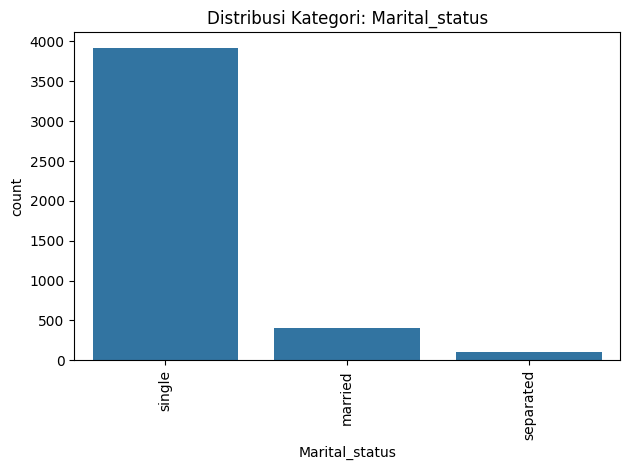

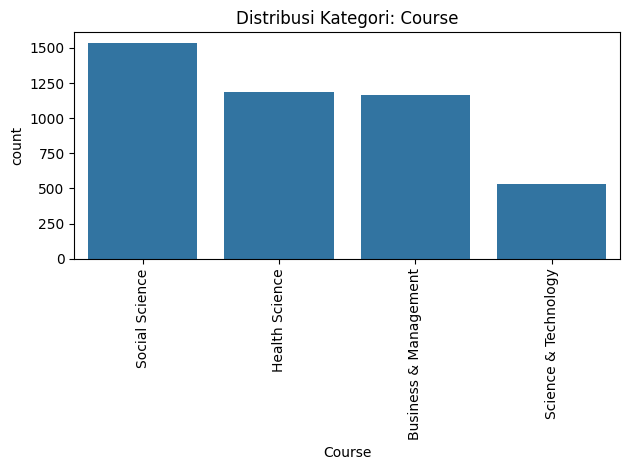

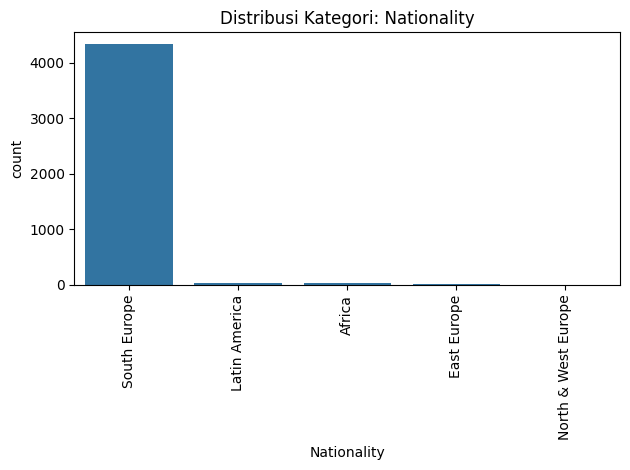

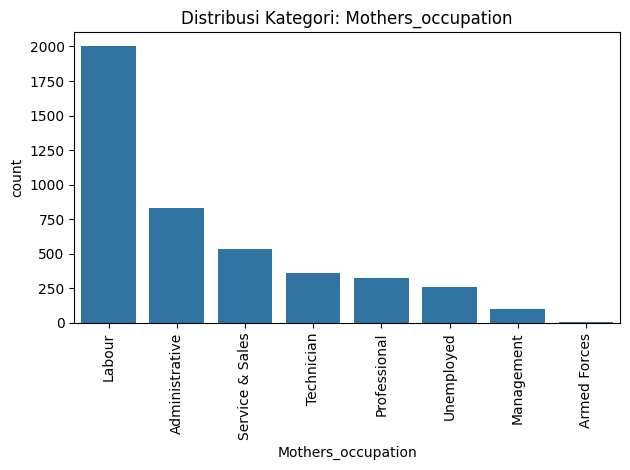

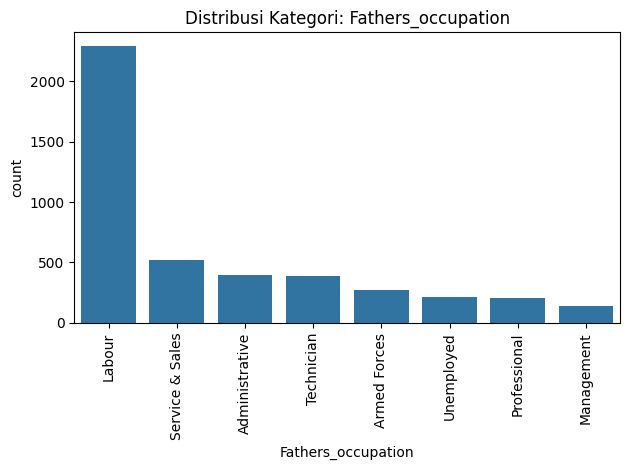

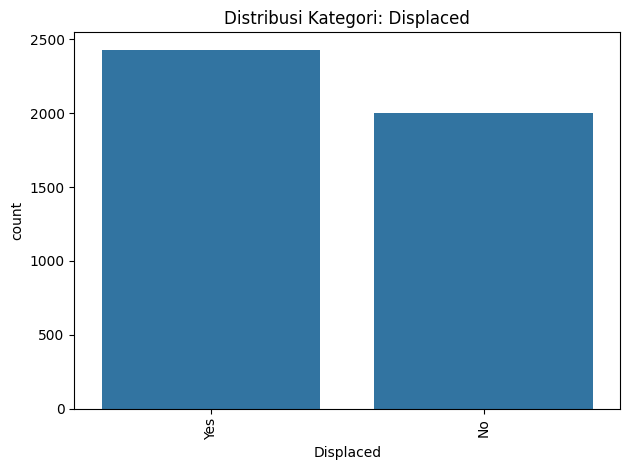

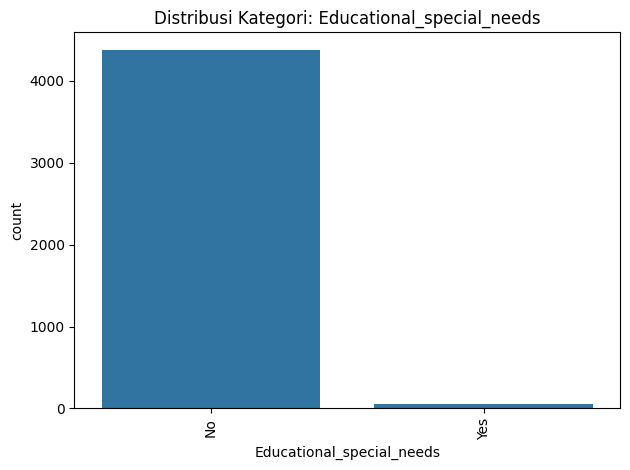

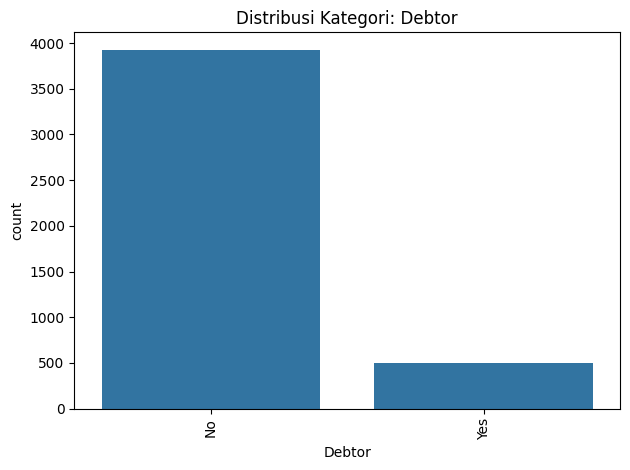

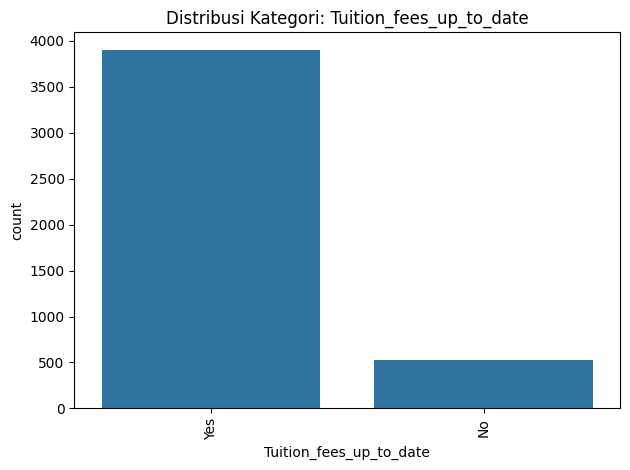

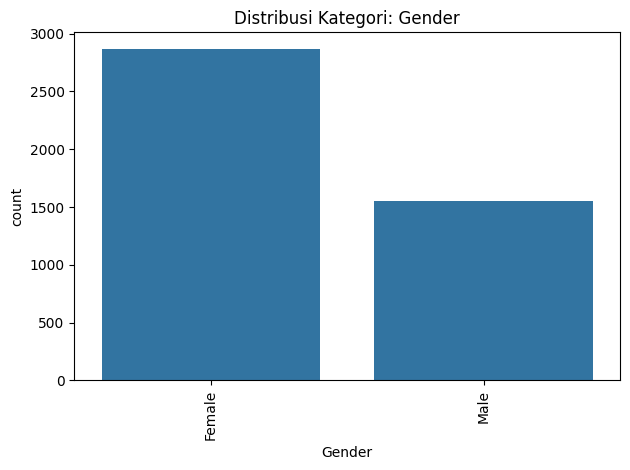

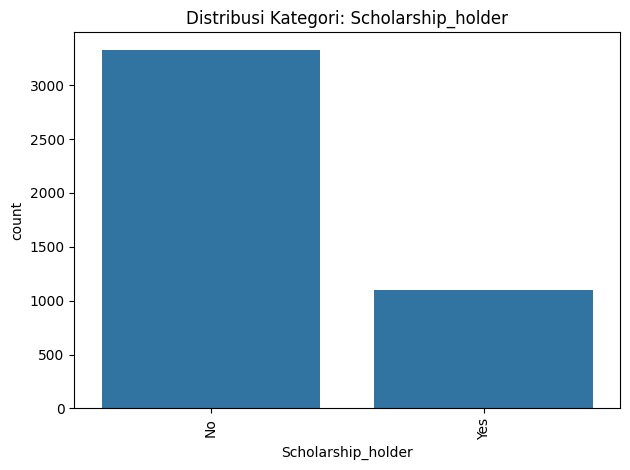

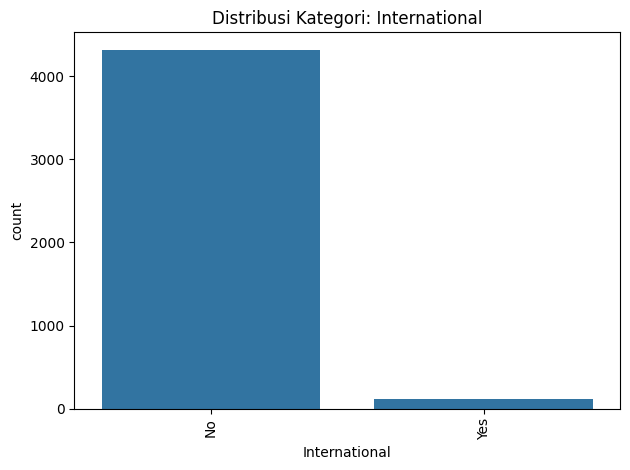

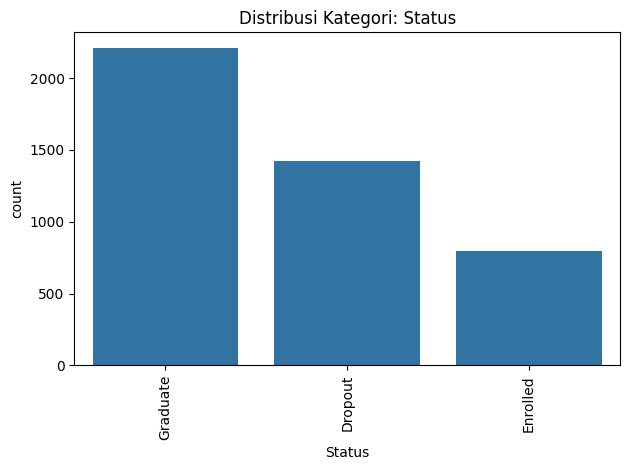

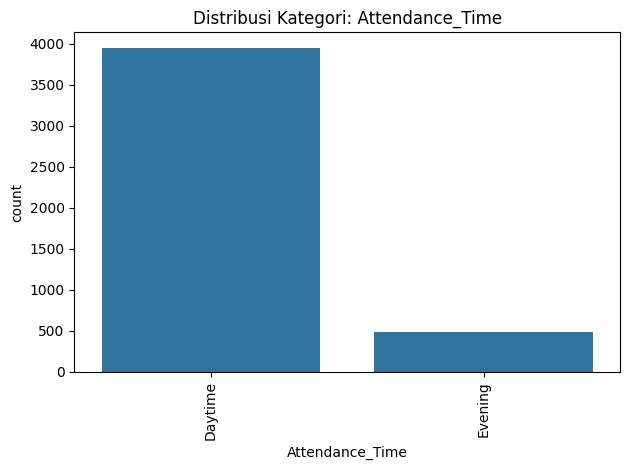

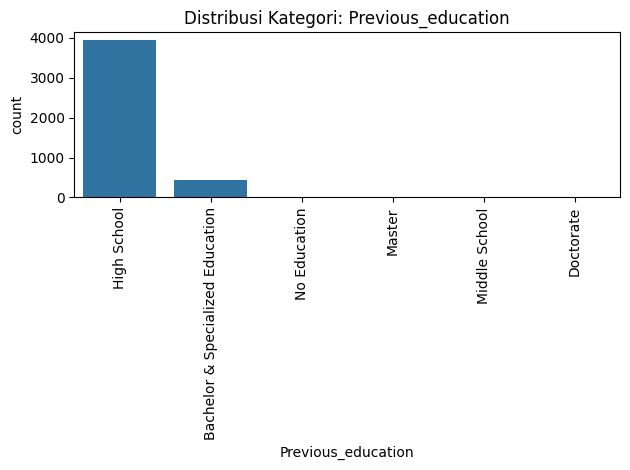

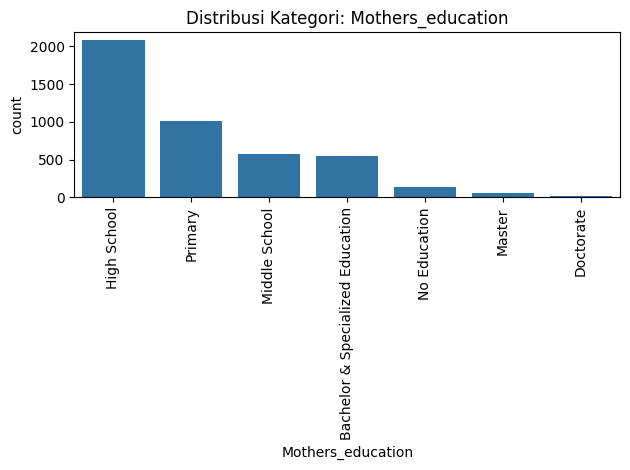

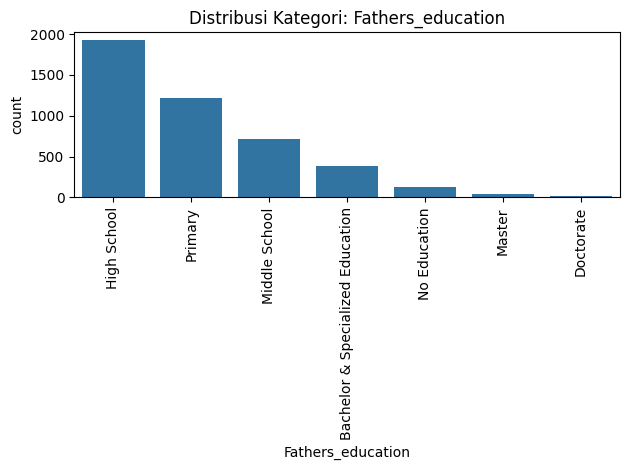

In [24]:
# Univariat Kategorikal: Countplot
def plot_univariate_categorical(data, cols):
    for col in cols:
        plt.figure()
        sns.countplot(data=data, x=col, order=data[col].value_counts().index)
        plt.title(f'Distribusi Kategori: {col}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

plot_univariate_categorical(df_cleaned, categorical_cols)

Berikut berikut beberapa poin yang dapat diambil dari hasil visualisasi di atas:
1. Status pernikahan mayoritas mahasiswa single (lajang).
2. Jurusan Social Science & Business termasuk populer.
3. Asal Geografis 70% mahasiswa berasal dari Eropa Selatan.
4. Pekerjaan Orang Tua, ibu & ayah dominan di bidang Labour (buruh) dan Administratif.
5. Hampir semua membayar uang kuliah tepat waktu & tanpa utang.
6. Rasio gender lebih banyak wanita.
7. Mayoritas kuliah siang hari.
8. Latar Belakang Pendidikan SMA sebagai pendidikan sebelumnya paling umum.
9. Pendidikan orang tua dominan SD-SMA.
10. Sangat sedikit kebutuhan pendidikan khusus.
11. Penerima beasiswa dan mahasiswa internasional sangat minoritas.

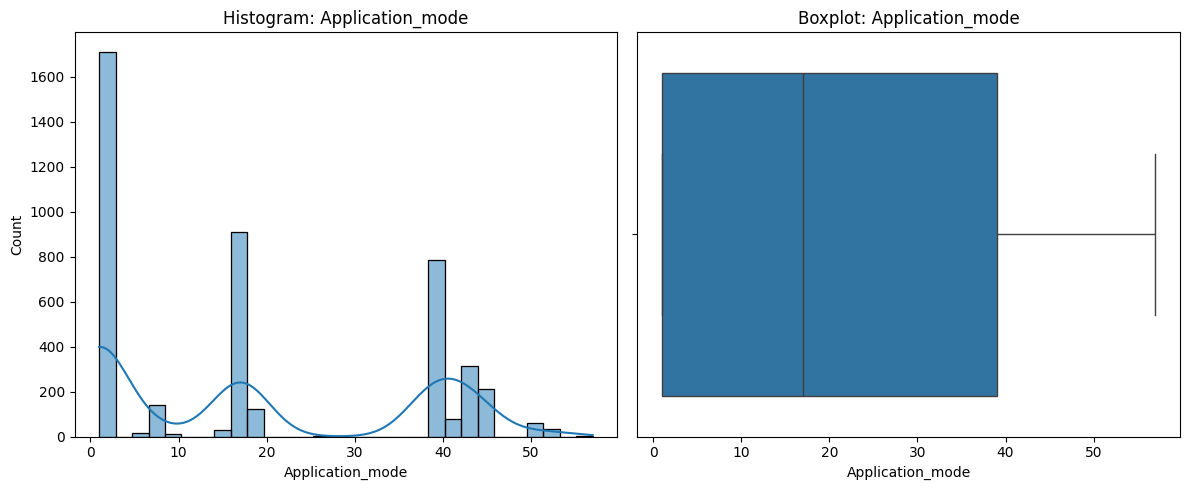

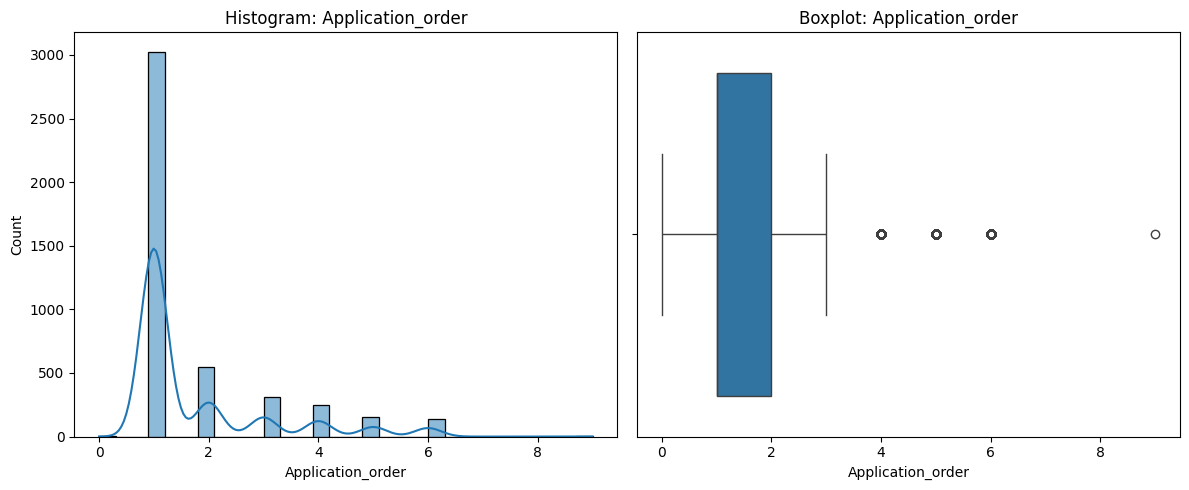

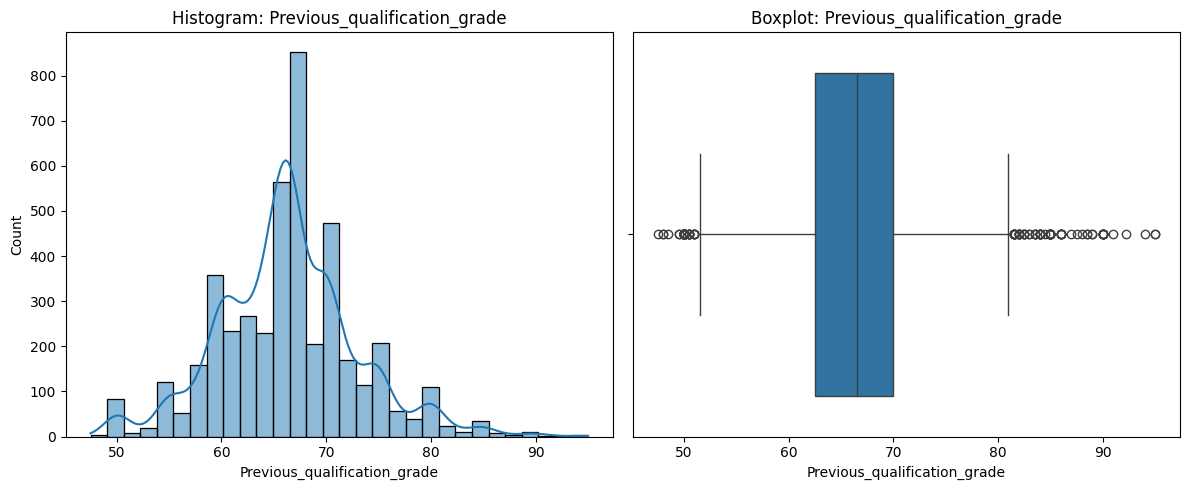

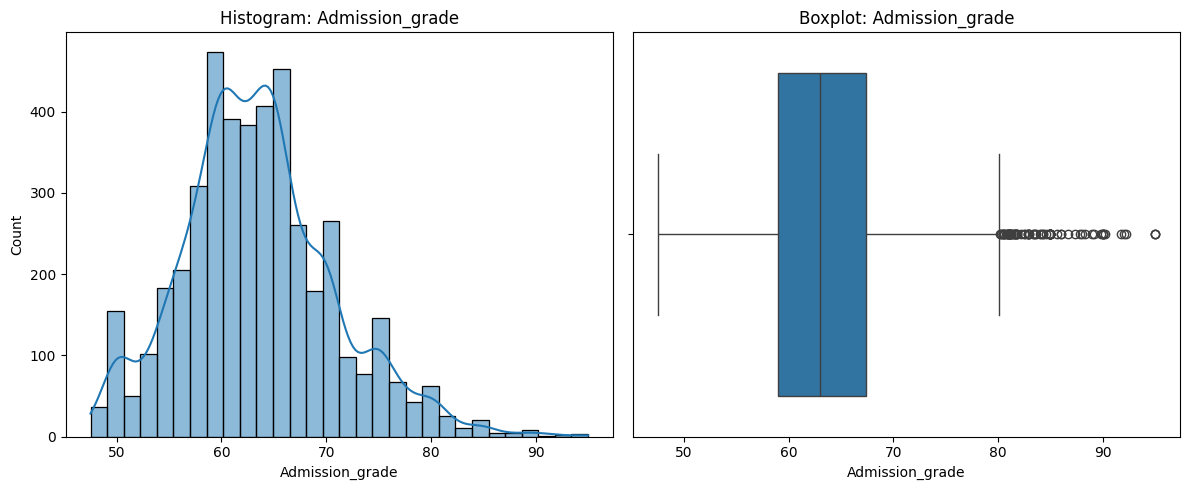

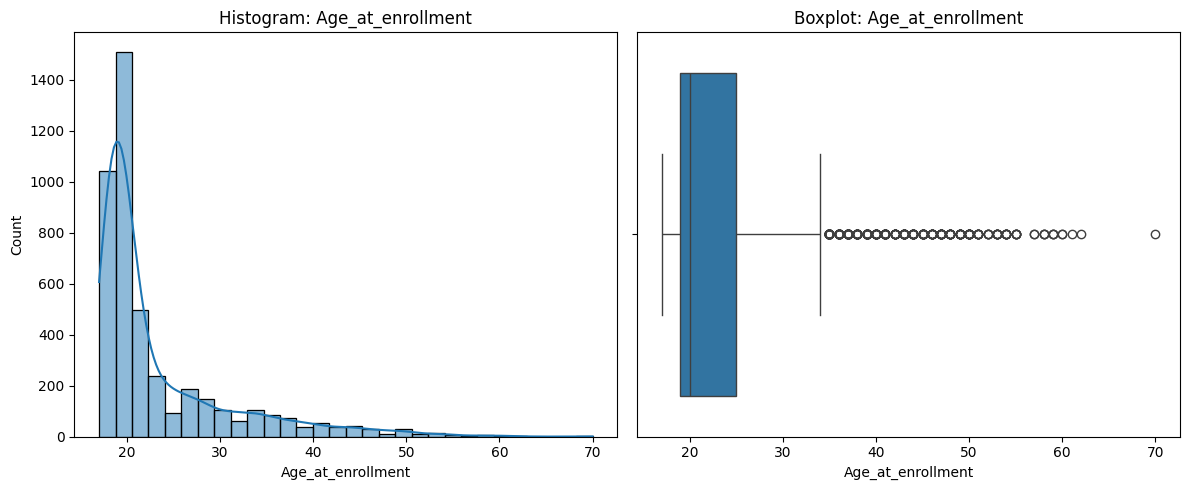

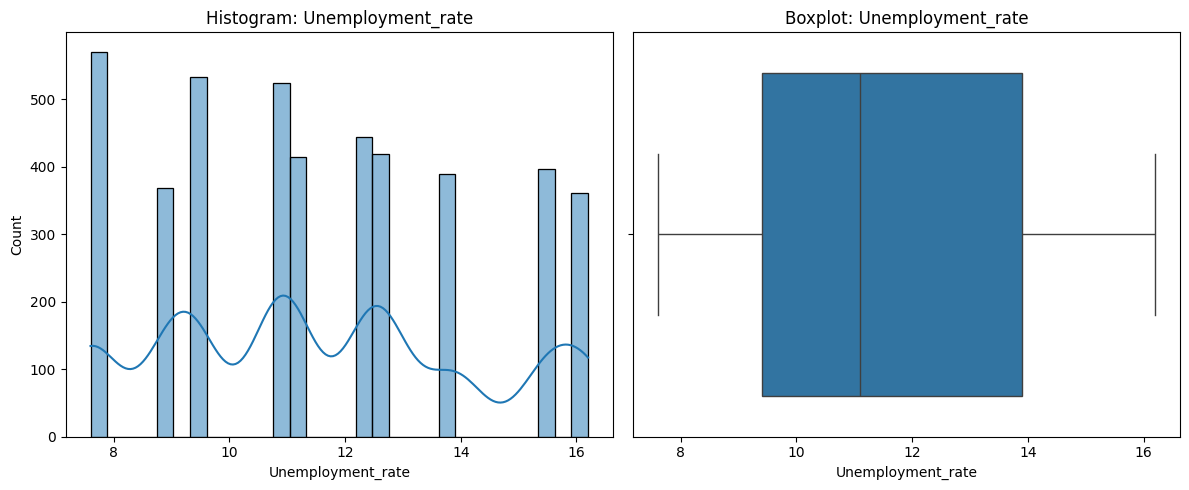

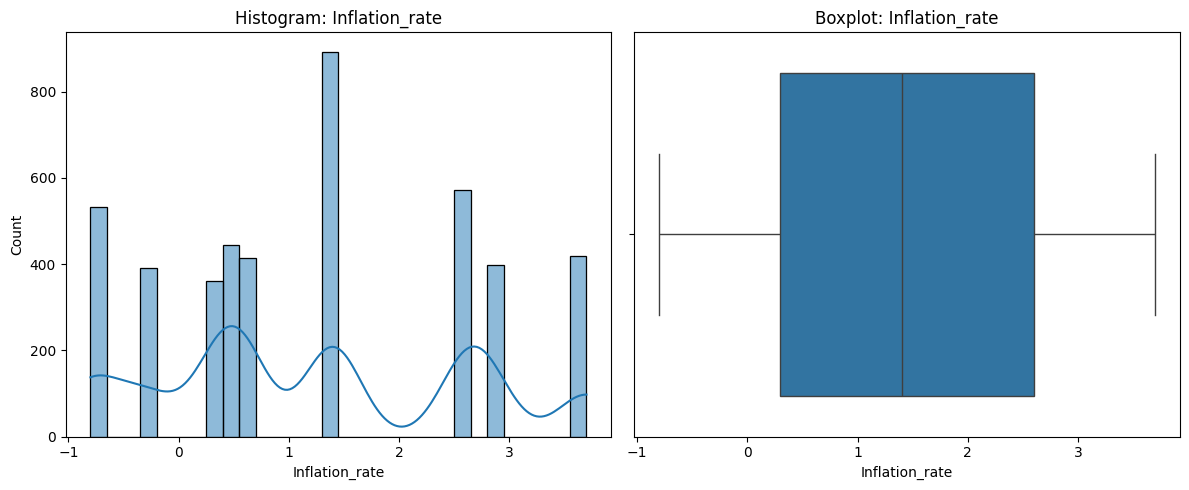

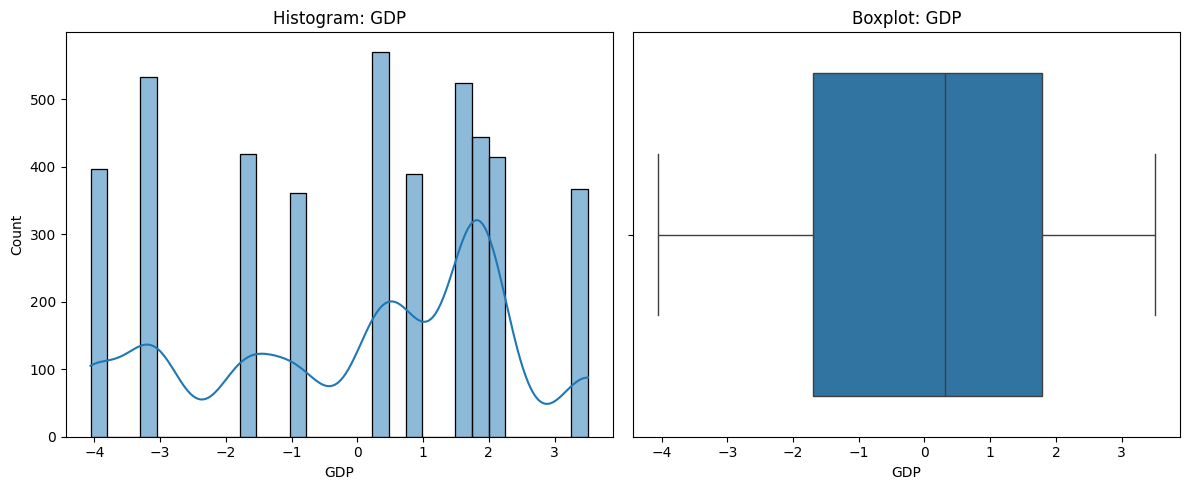

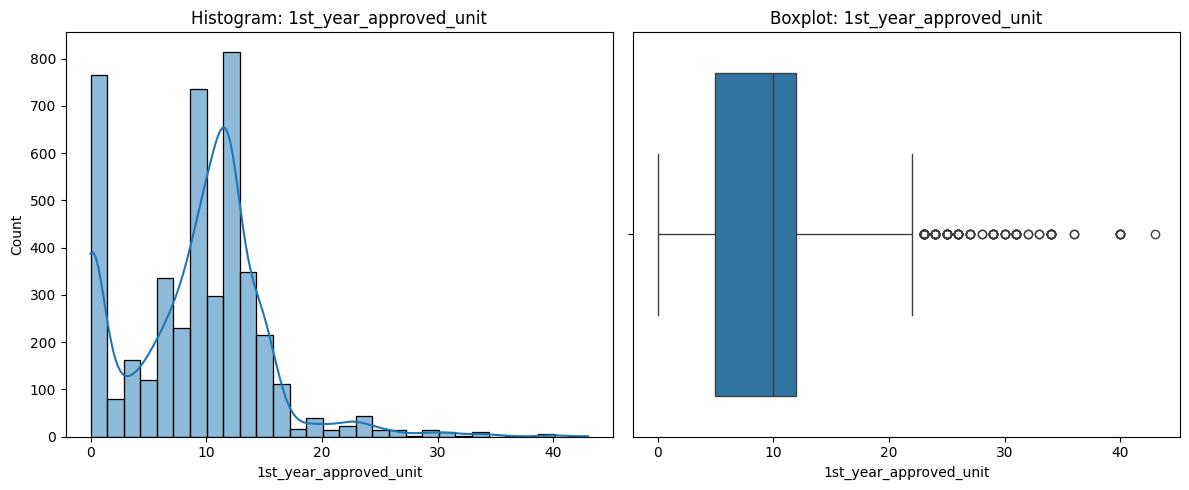

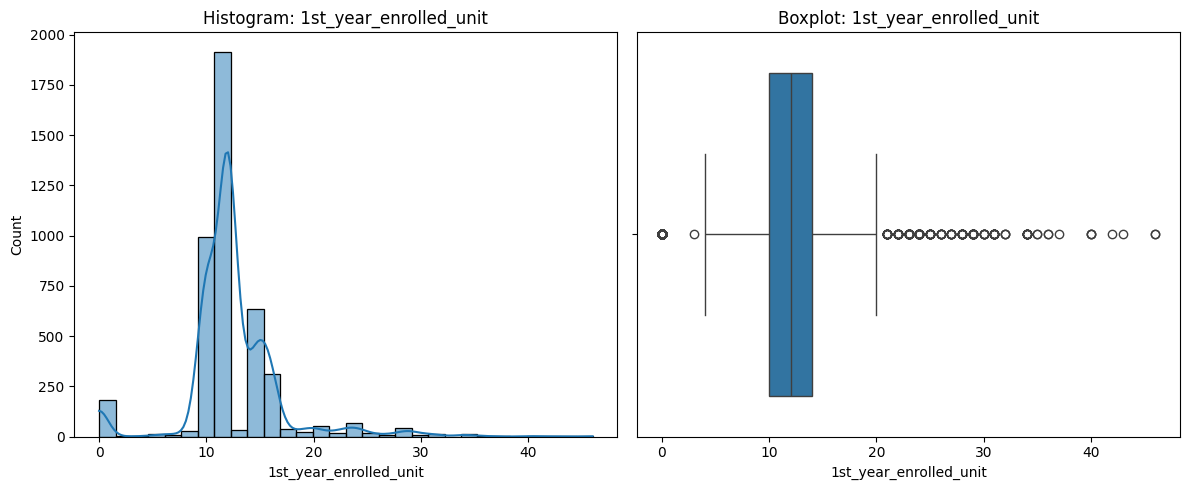

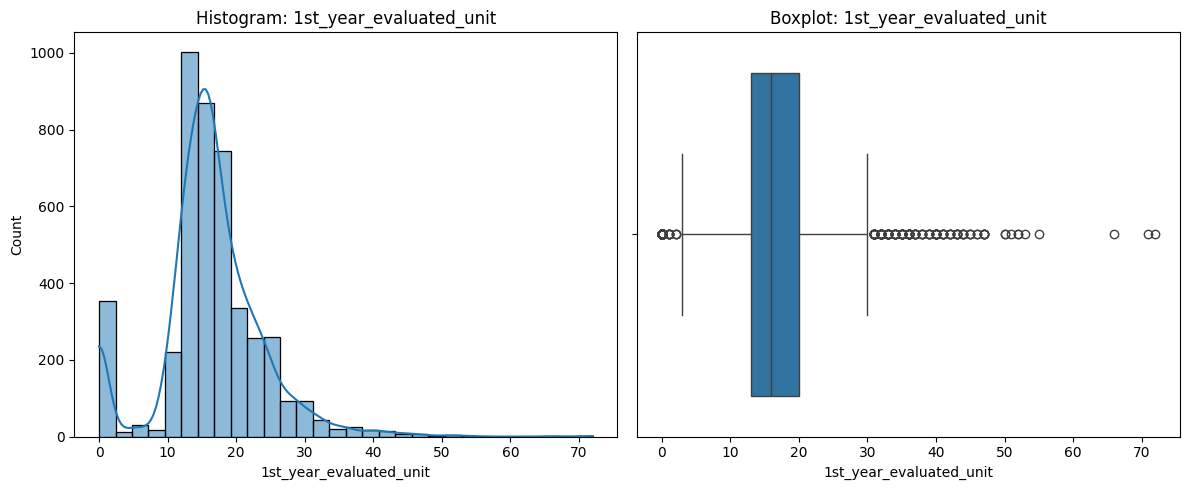

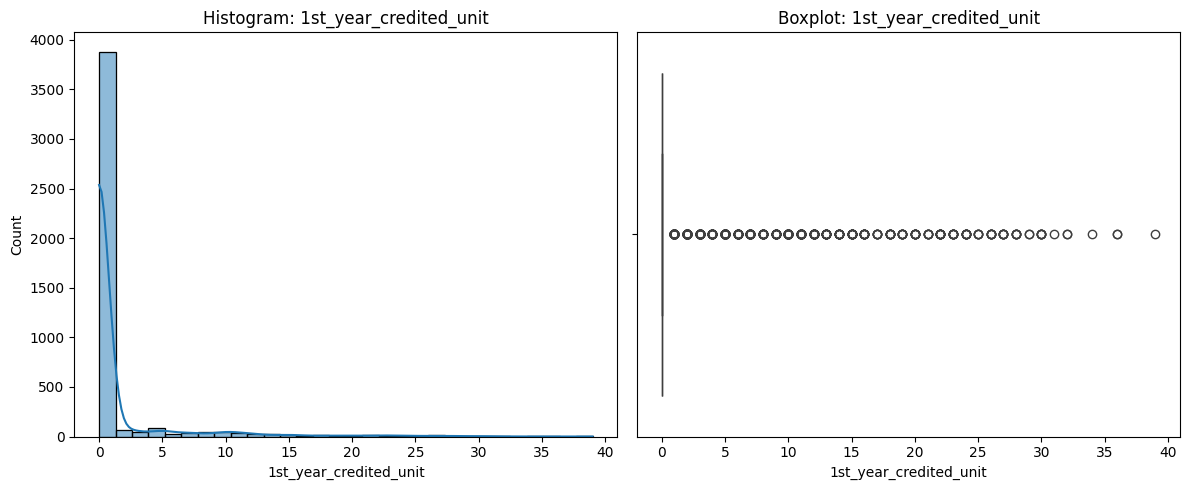

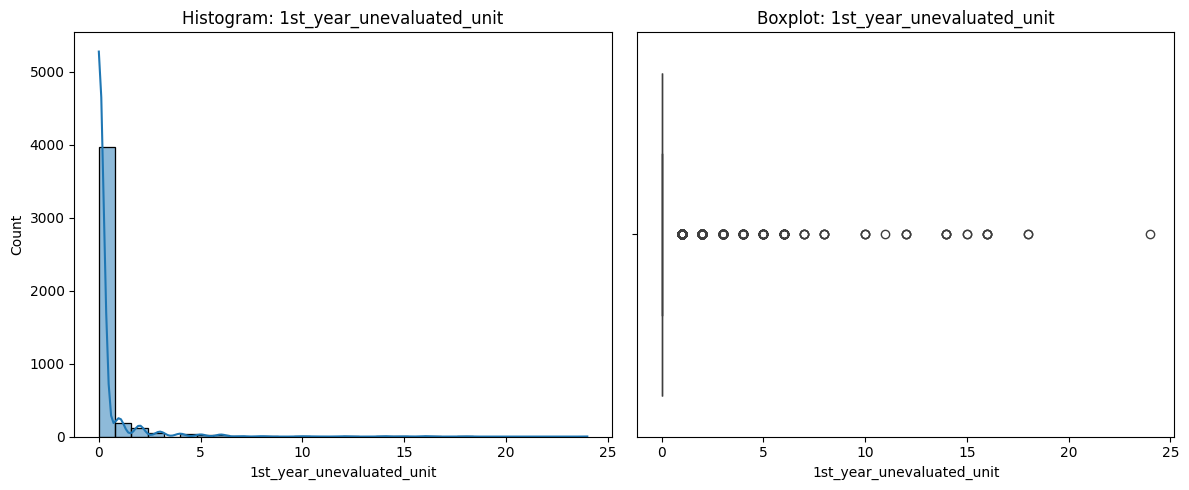

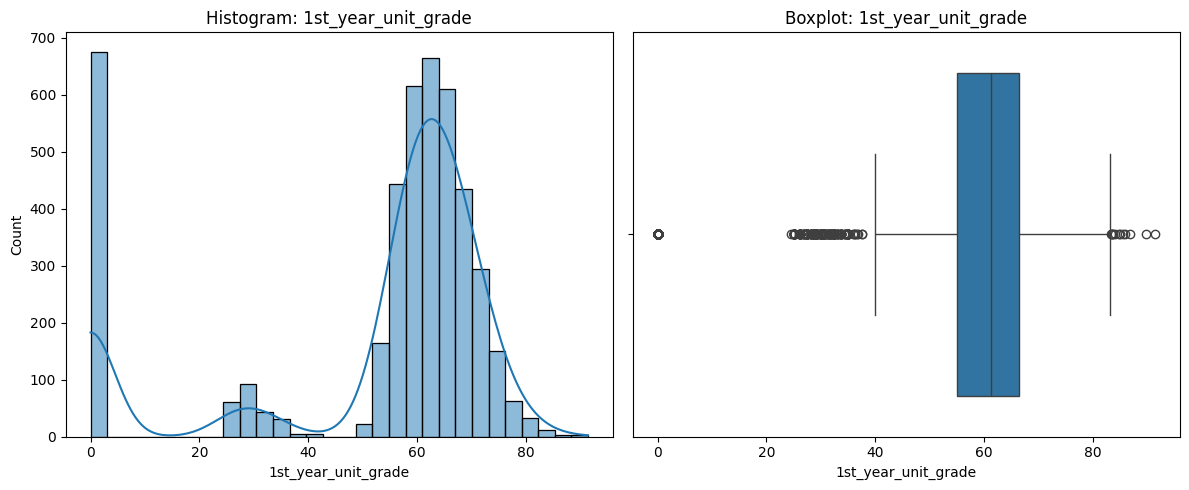

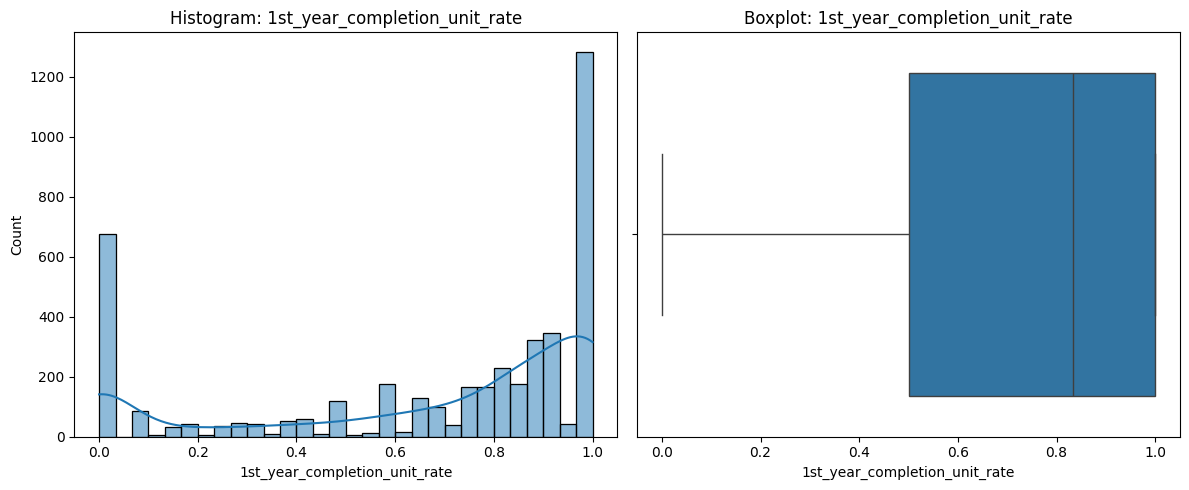

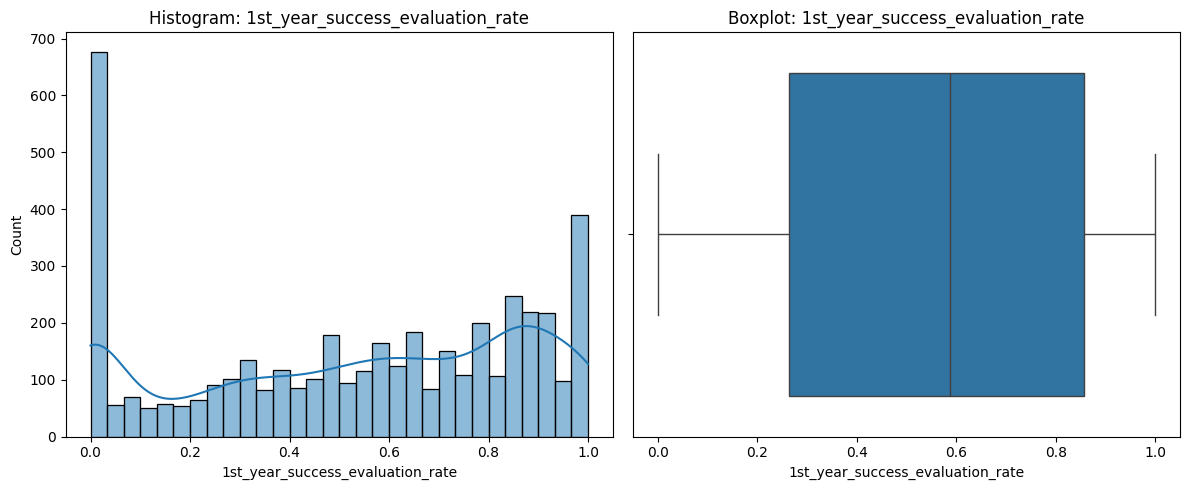

In [25]:
# Univariat Numerik: Histogram dan Boxplot
def plot_univariate_numeric(data, cols):
    for col in cols:
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Histogram: {col}')

        plt.subplot(1,2,2)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot: {col}')

        plt.tight_layout()
        plt.show()

plot_univariate_numeric(df_cleaned, numeric_cols)

Berikut berikut beberapa poin yang dapat diambil dari hasil visualisasi di atas:
1. Pendaftaran: Mayoritas di moda(jalur) 1 & 17, 80% pendaftar urutan 1-3.
2. Nilai Masuk: Nilai kualifikasi & masuk normal (60-80).
3. Demografi: Usia dominan 17-25 tahun (puncak 19) dengan outlier >50 tahun.
4. Ekonomi: Pengangguran 8-12% (normal), inflasi & GDP miring ber-outlier.
5. Beban Kuliah: Diambil 0-40 (puncak 5-10), lulus miring positif (banyak lulus sedikit).
6. Indikator Kunci: 70% rasio kelulusan <0.5; nilai rata-rata 40-60.
7. Kredit & Evaluasi: Mayoritas dapat 0-5 kredit; sedikit mata kuliah tidak dievaluasi

#### Bivariat

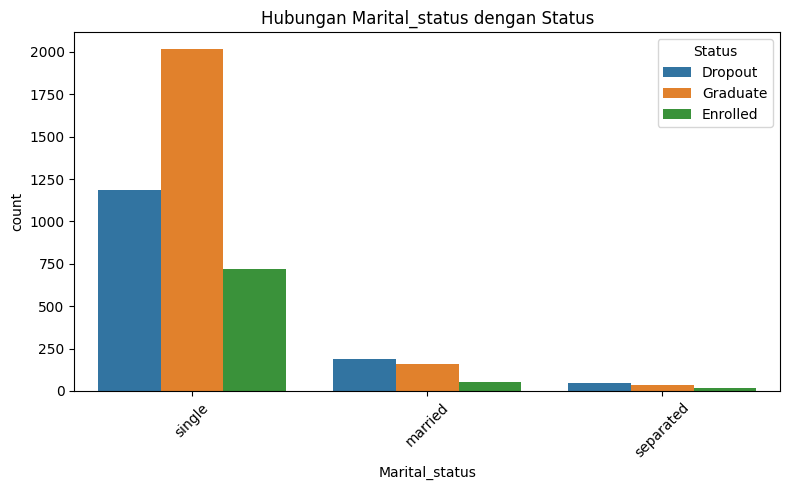

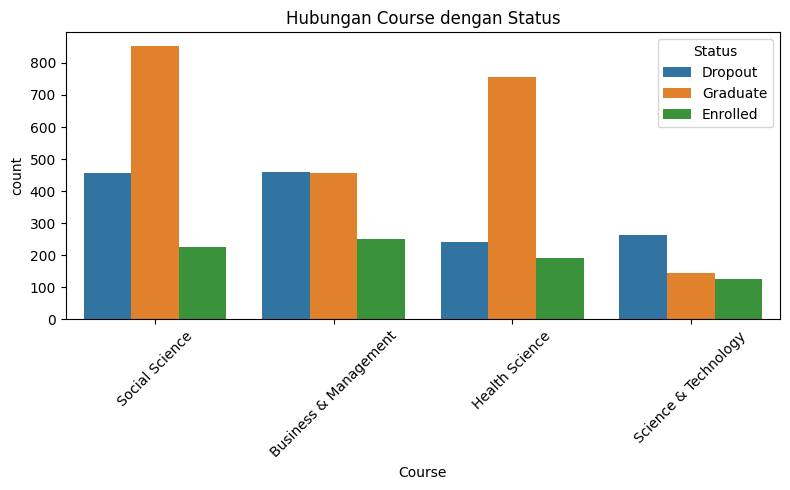

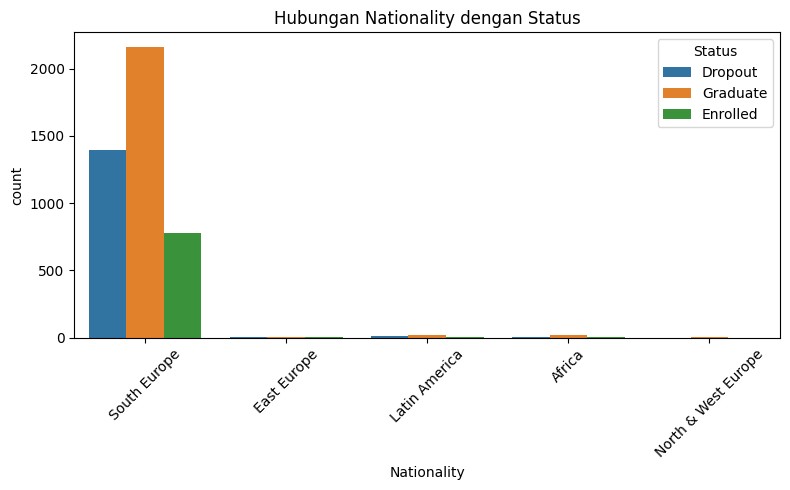

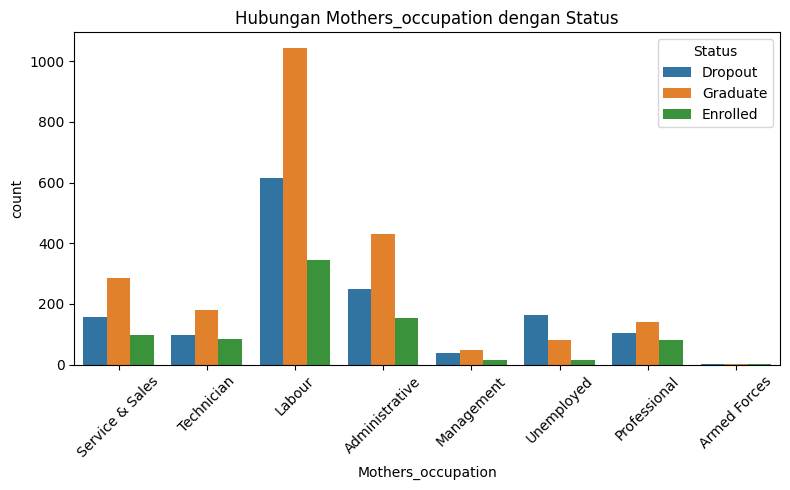

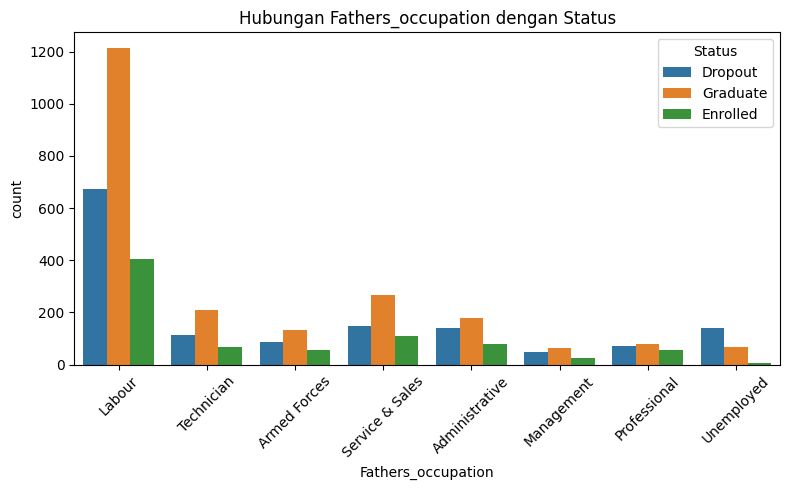

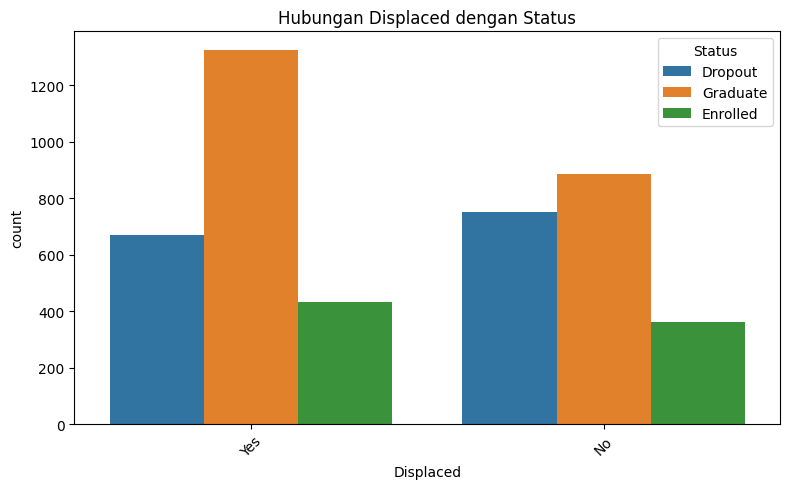

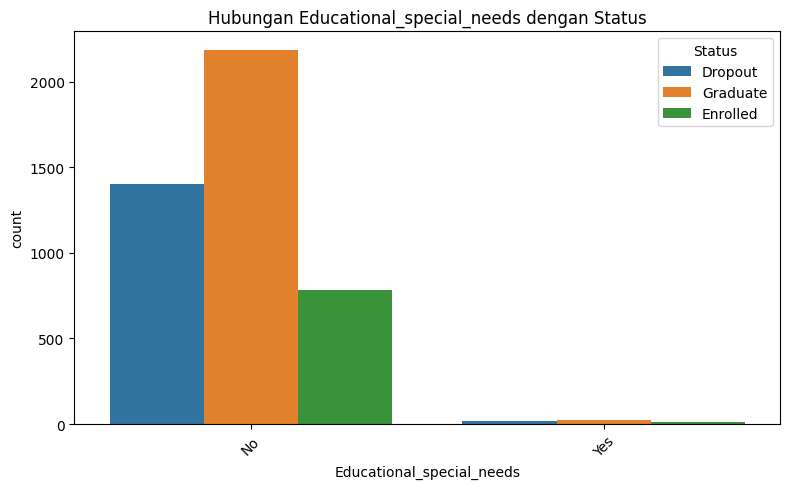

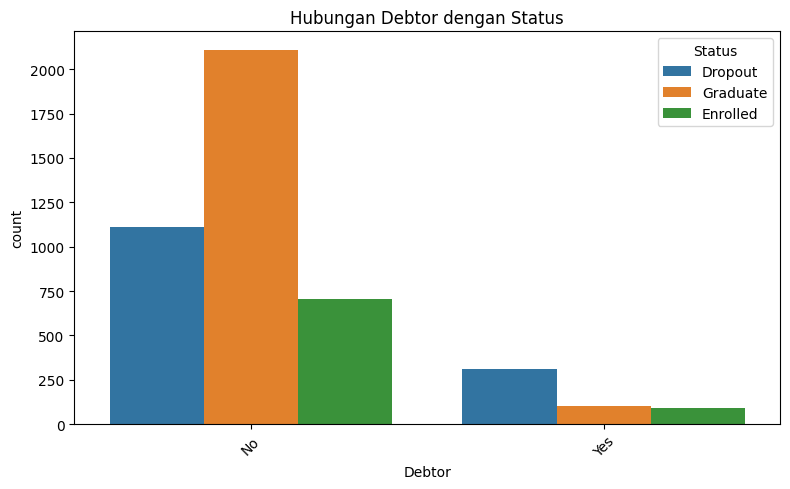

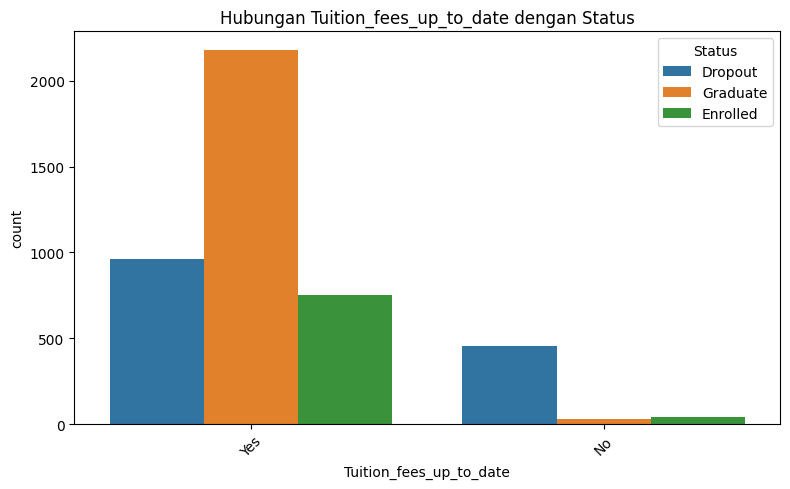

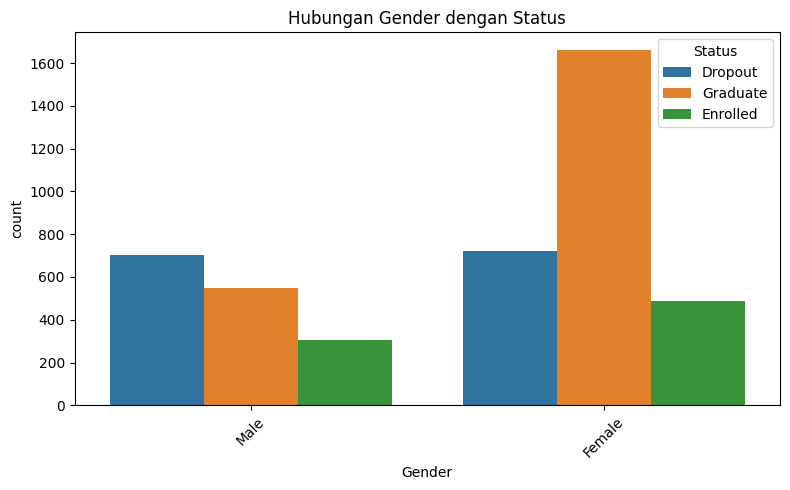

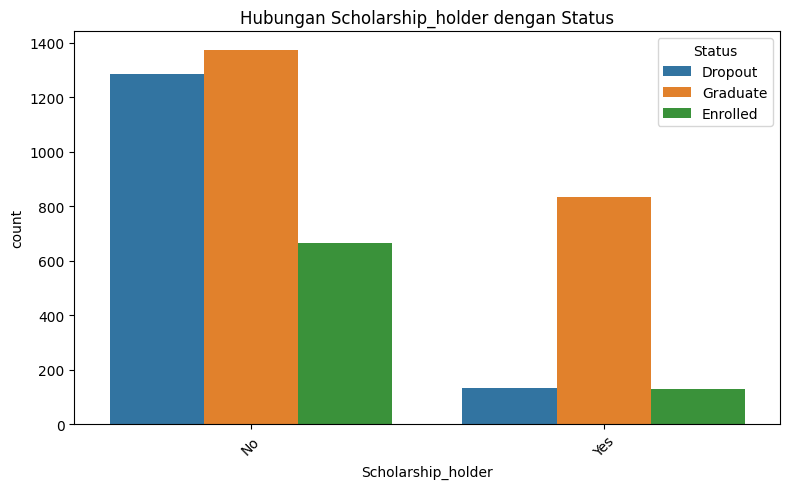

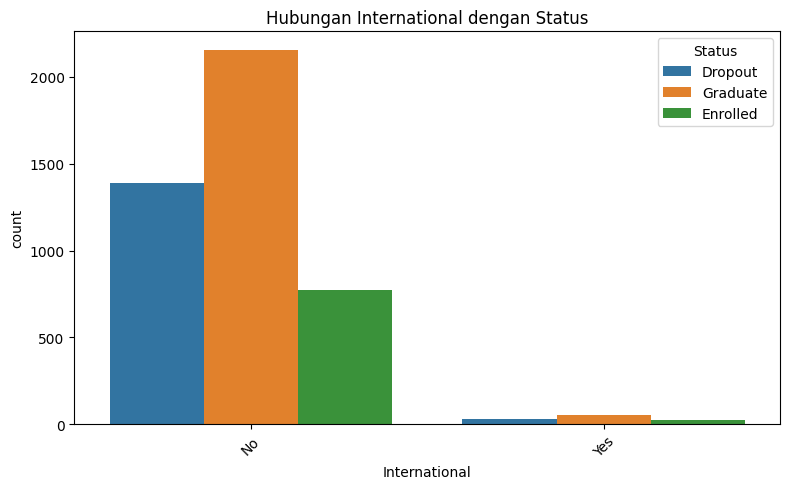

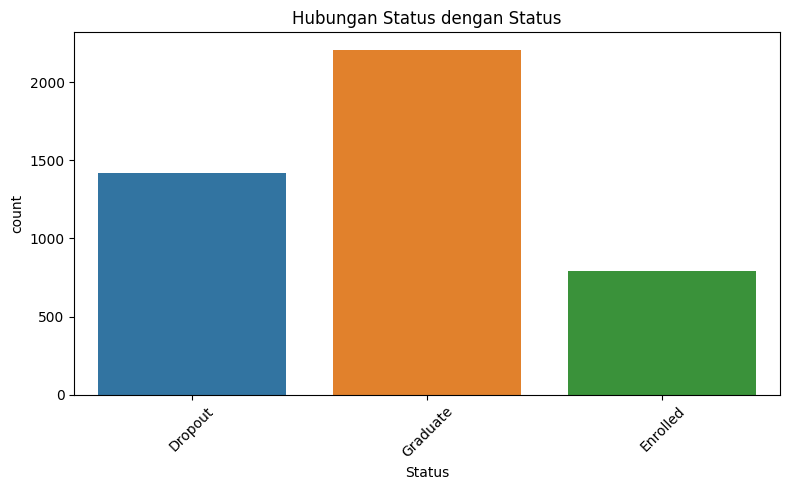

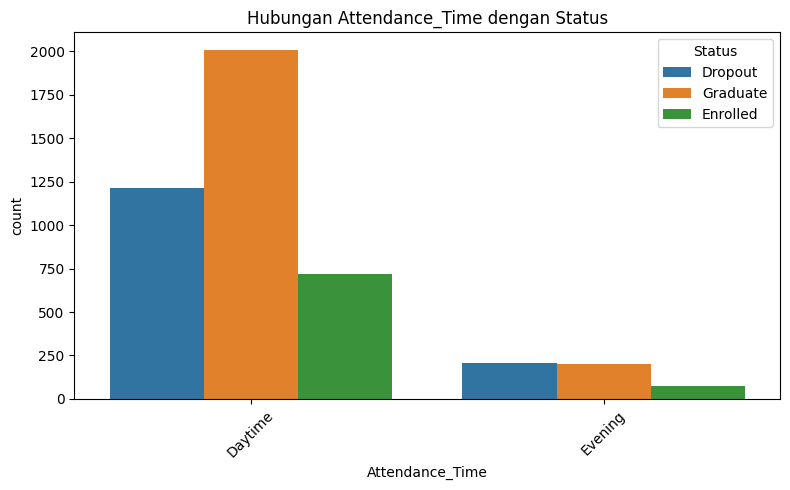

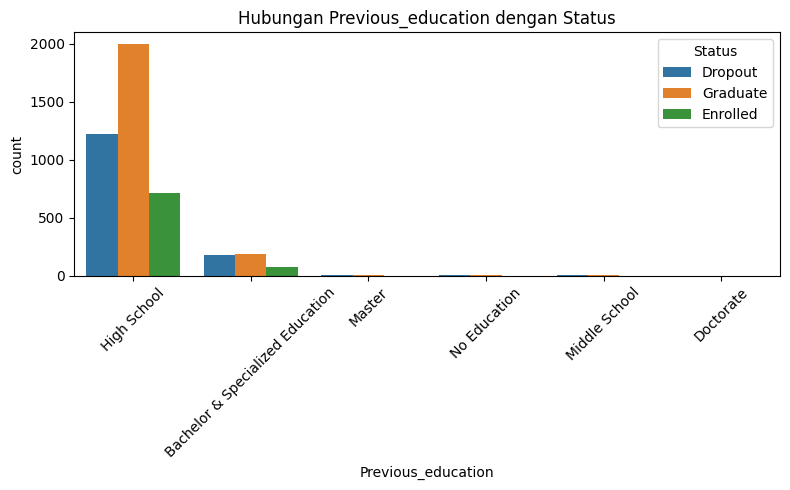

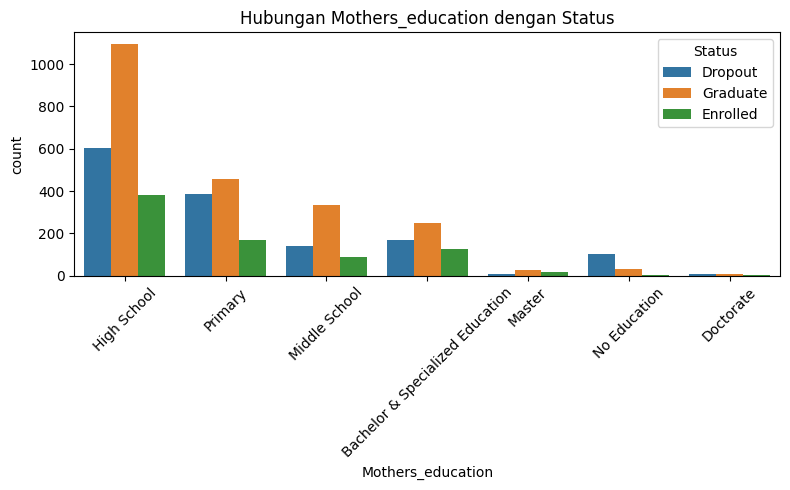

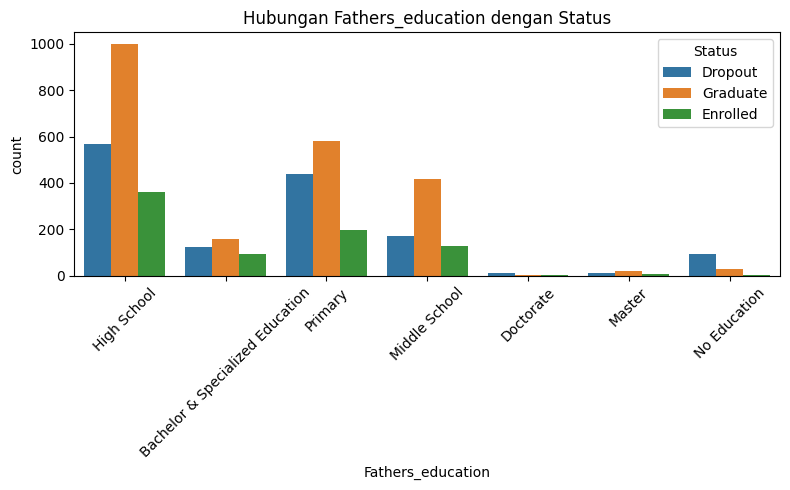

In [26]:
# Visualisasi variabel kategorikal terhadap variabel status menggunakan countplot
def plot_cat_vs_status(data, cat_cols, status_col='Status'):
    for cat in cat_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=data, x=cat, hue=status_col)
        plt.title(f'Hubungan {cat} dengan {status_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_cat_vs_status(df_cleaned, categorical_cols)

Visualisasi di atas yang mengalami dropout lebih banyak bebereapa dikarenakan memang data pada bagian tertentu yang mendominasi, seperti data yang menghadiri kuliah pada siang hari lebih banyak, kemudian data dropout pada mahasiswa lokal lebih banyak karena memang mahasiswa internasional sangat sedikit.

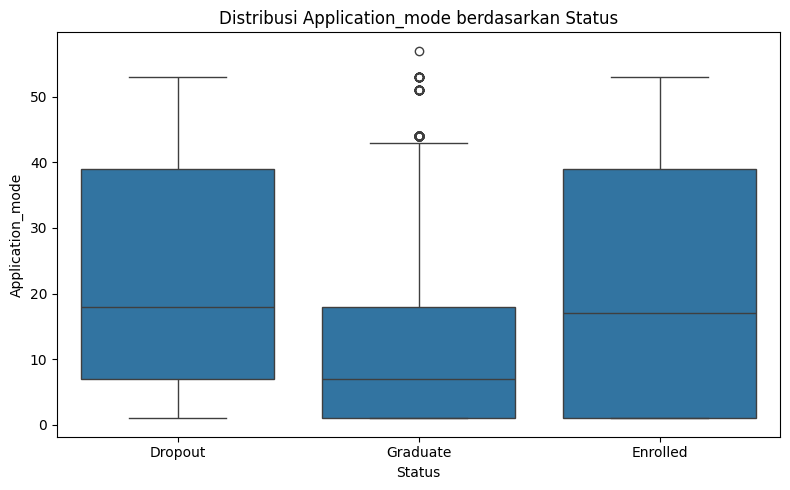

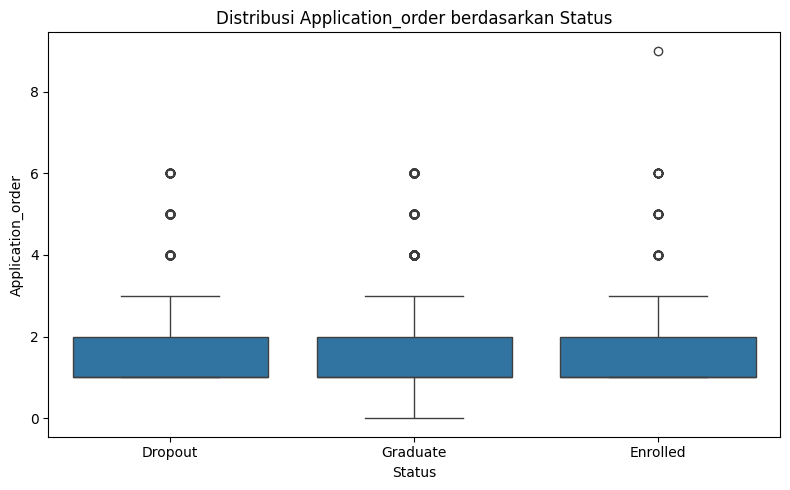

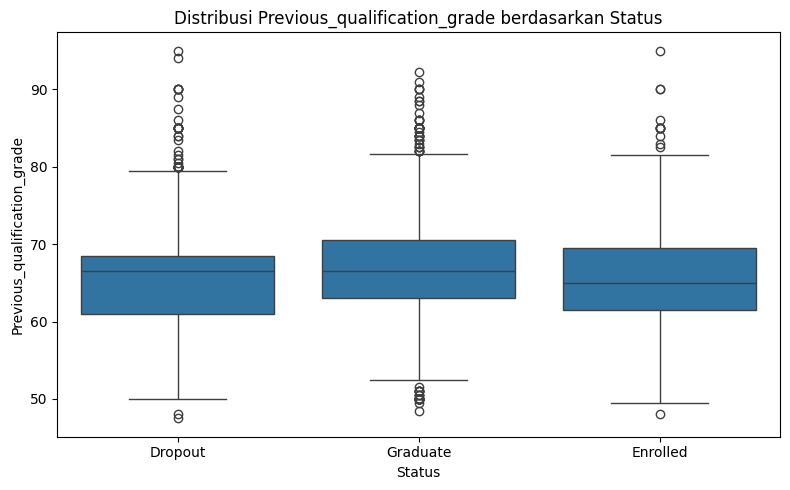

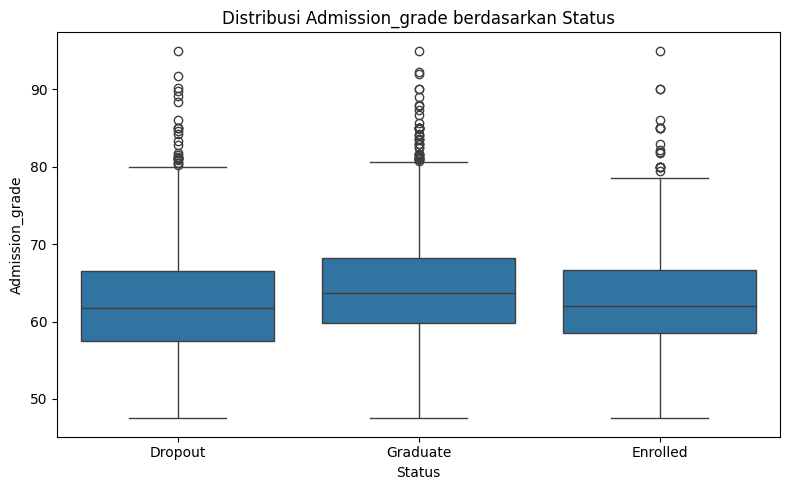

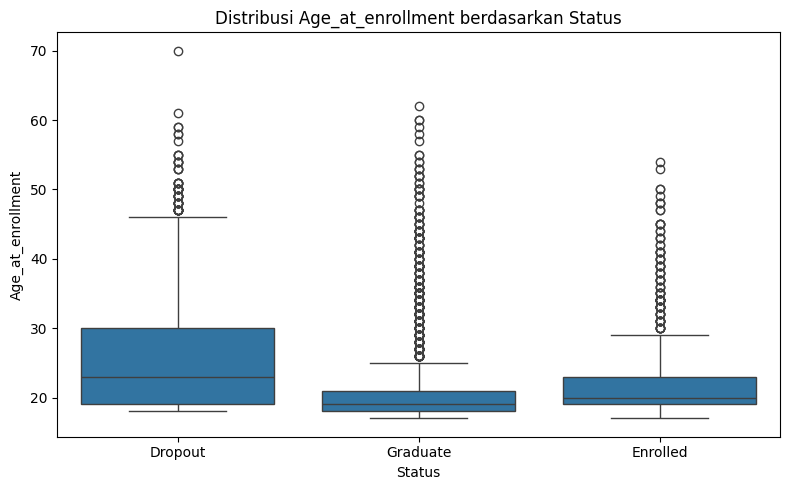

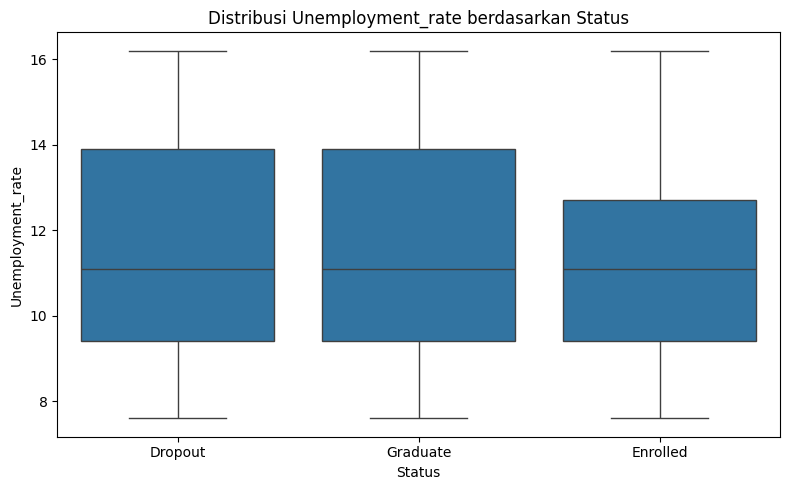

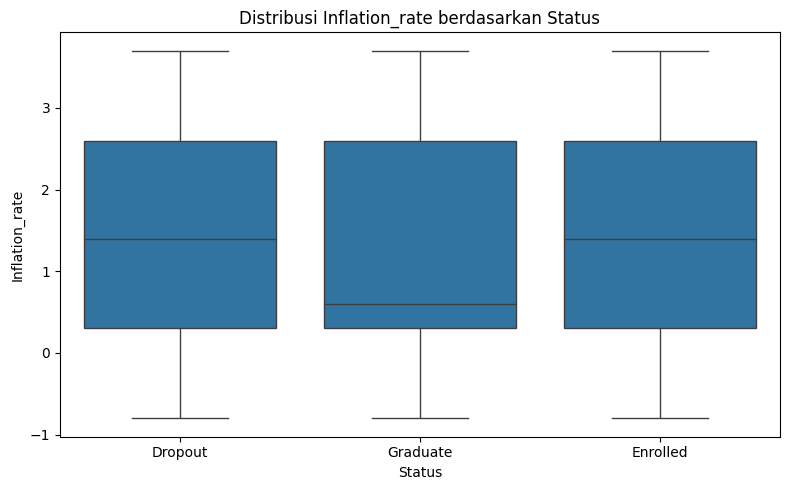

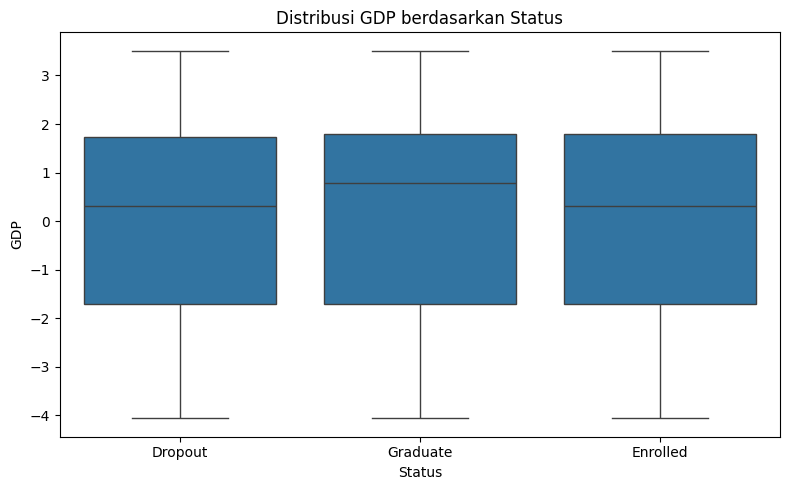

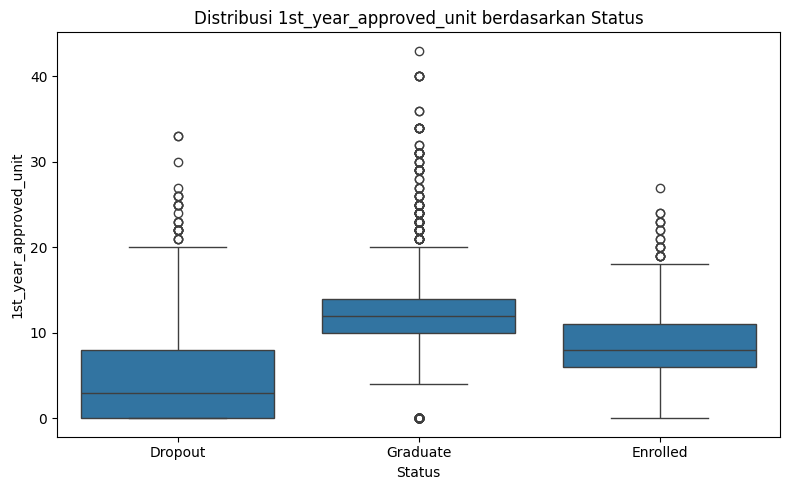

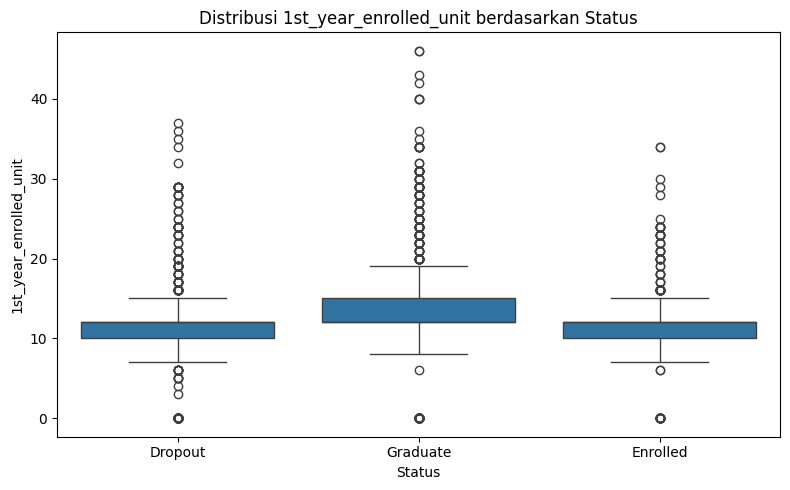

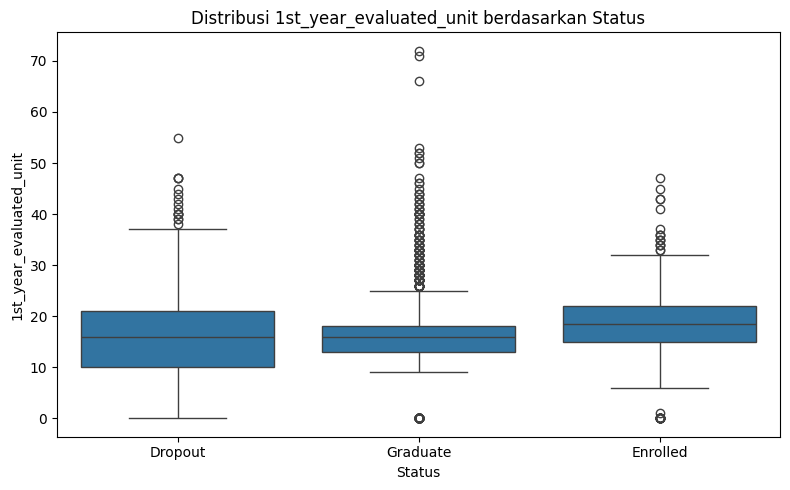

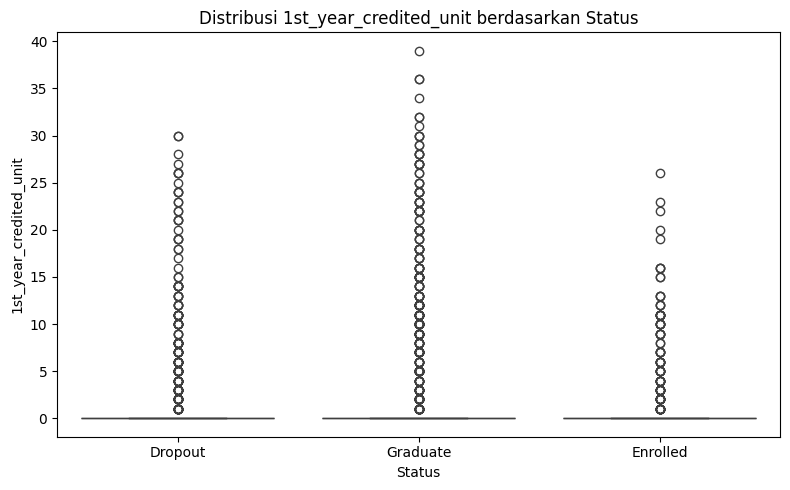

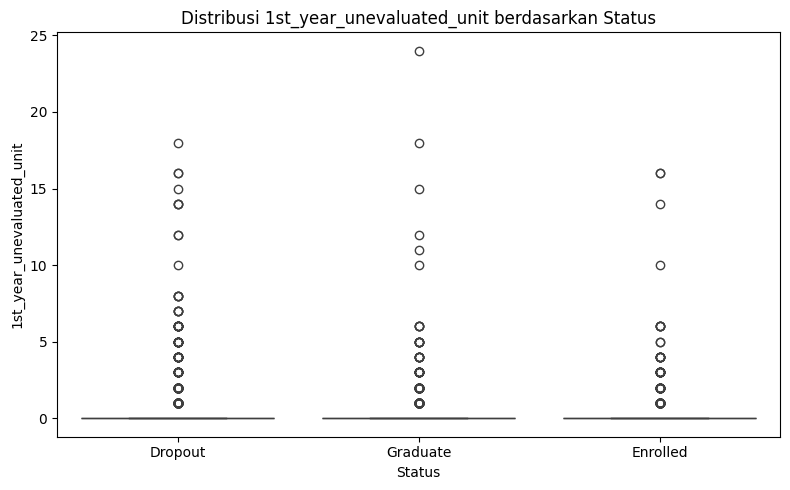

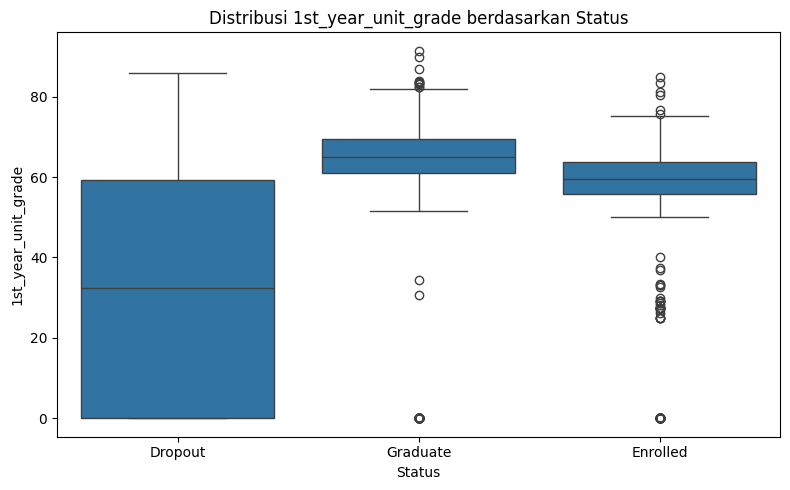

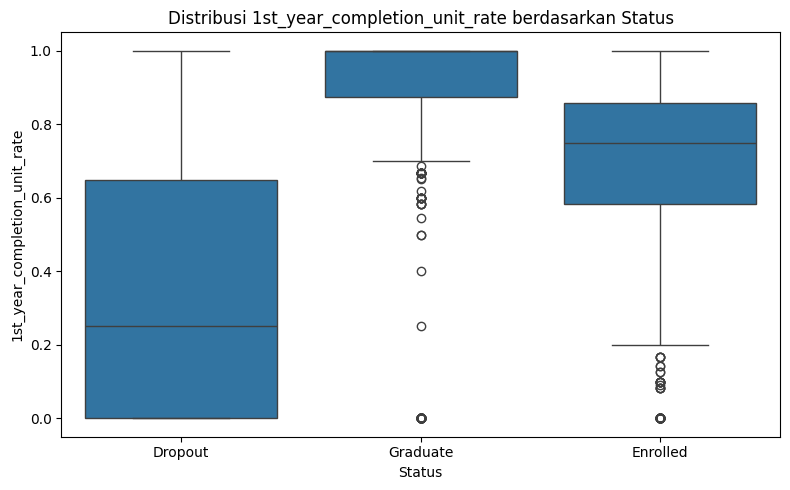

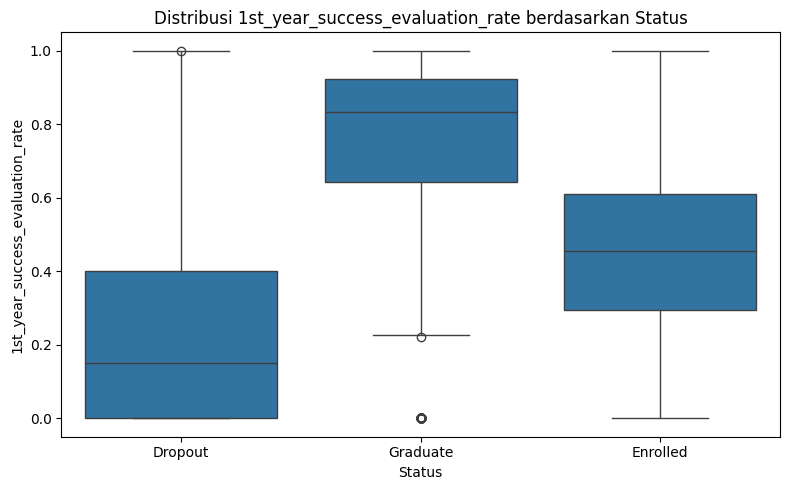

In [27]:
# Visualisasi variabel numerik terhadap variabel status menggunakan boxplot
def plot_num_vs_status(data, num_cols, status_col='Status'):
    for num in num_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=status_col, y=num, data=data)
        plt.title(f'Distribusi {num} berdasarkan {status_col}')
        plt.tight_layout()
        plt.show()

plot_num_vs_status(df_cleaned, numeric_cols)

Dari visualisasi di atas dapat diketahui bahwa mahasiswa yang lulus mayoritas memiliki kinerja dan kesuksesan akademik yang lebih tinggi dibandingkan dengan yang tidak.

#### Multivariat

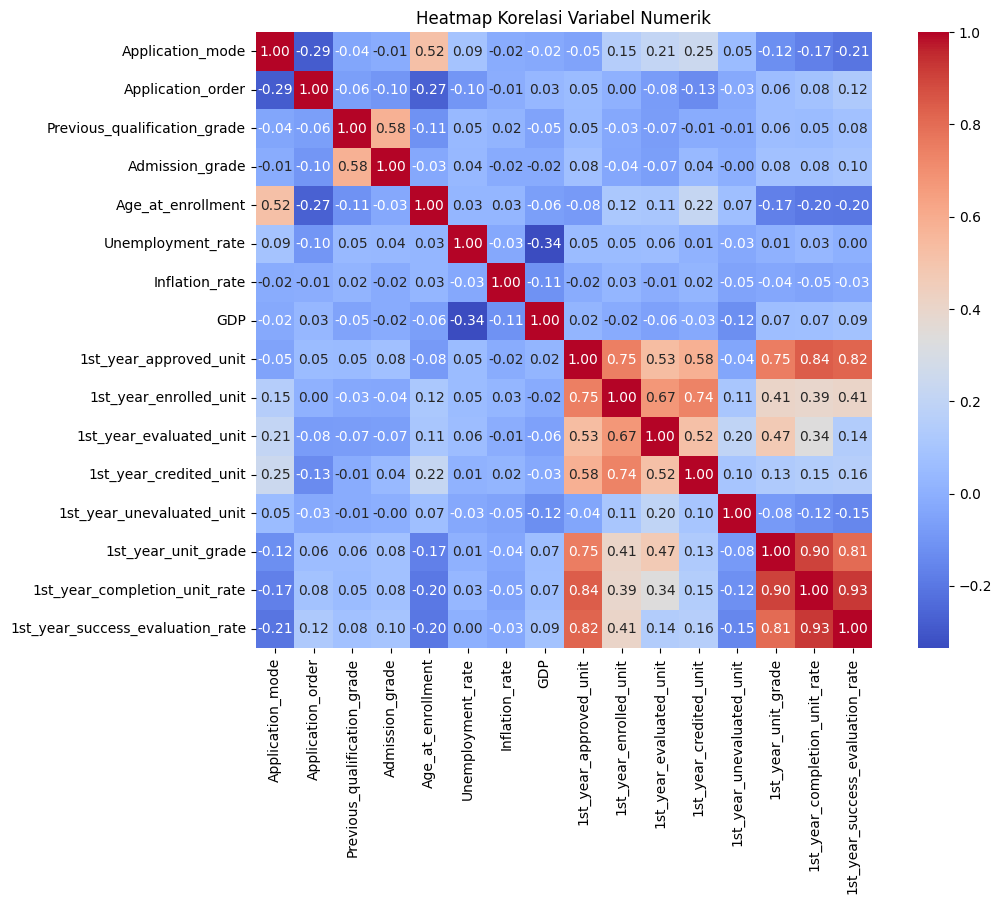

In [28]:
# Heatmap Korelasi antar variabel numerik
def plot_multivariate_correlation(data, num_cols):
    corr = data[num_cols].corr()
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Heatmap Korelasi Variabel Numerik')
    plt.show()

plot_multivariate_correlation(df_cleaned, numeric_cols)

Dari heatmap korelasi, terlihat hubungan kuat antara Previous_qualification_grade dan Admission_grade (0.58), serta antar variabel performa unit tahun pertama seperti 1st_year_approved_unit, 1st_year_completion_unit_rate, dan 1st_year_success_evaluation_rate dengan korelasi hingga 0.93. Selain itu, korelasi positif kuat beberapa variabel unit tahun pertama, terutama 1st_year_approved_unit (0.75) dan 1st_year_completion_unit_rate (0.84), menunjukkan keterkaitan erat antara nilai akademik sebelumnya dan performa tahun pertama menjadi indikasi faktor penting.

## Data Preparation / Preprocessing

In [29]:
df_pred = df_cleaned.copy()

In [30]:
# Memfilter baris dengan status 'Enrolled'
df_pred = df_pred[df_cleaned['Status'] != 'Enrolled']

Data dengan status 'Enrolled' didrop karena data yang akan dilatih dan diklasifikasikan adalah data dengan status 'Dropout' dan 'Graduate'.

In [31]:
# Memisahkan fitur dengan target
X = df_pred.drop(columns=['Status'])
y = df_pred['Status']

In [32]:
# Membagi data menjadi data latih dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Mengidentifikasi kembali kolom kategorikal dan numerik setelah memisahkan target
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [34]:
# Standarisasi fitur numerik dan one-hot encoding fitur kategorikal
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [35]:
# Menggabungkan transformasi data numerik dan kategorikal dalam satu pipeline untuk kolom terkait
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Modeling

In [36]:
# Memuat model Gradient Boosting dengan seed acak dalam variabel 'model'
model = GradientBoostingClassifier(random_state=42)

In [37]:
# Membuat pipeline dengan preprocessing, SMOTE, dan classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

In [38]:
# Training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Application_mode',
                                                   'Application_order',
                                                   'Previous_qualification_grade',
                                                   'Admission_grade',
                                                   'Age_at_enrollment',
                                                   'Unemployment_rate',
                                                   'Inflation_rate', 'GDP',
                                                   '1st_year_approved_unit',
                                                   '1st_year_enrolled_unit',
                                                   '1st_year_evaluated_unit',
                                                   '1st_year_credited_unit',
                                                   '1st_year...
                                                   'Nationality',
                                                   'Mothers_occupation',
                                                   'Fathers_occupation',
                                                   'Displaced',
                                                   'Educational_special_needs',
                                                   'Debtor',
                                                   'Tuition_fees_up_to_date',
                                                   'Gender',
                                                   'Scholarship_holder',
                                                   'International',
                                                   'Attendance_Time',
                                                   'Previous_education',
                                                   'Mothers_education',
                                                   'Fathers_education'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [39]:
# Prediksi model
y_pred = pipeline.predict(X_test)

## Evaluation

### Evaluasi Model

In [40]:
# Evaluasi model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Dropout       0.90      0.86      0.88       277
    Graduate       0.91      0.94      0.93       449

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



Precision tinggi pada kedua kelas menunjukkan bahwa model jarang memberikan prediksi positif palsu (false positives). Recall yang sedikit lebih rendah pada kelas Dropout (0.86) dibanding Graduate (0.94) mengindikasikan model sedikit lebih sering melewatkan beberapa kasus dropout (false negatives). F1-score yang mendekati 0.9 pada kedua kelas menandakan keseimbangan yang baik antara precision dan recall.

In [41]:
# Menampilkan akurasi dari hasil prediksi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 90.77%


Model menghasilkan akurasi prediksi yang mencapai 90.77%

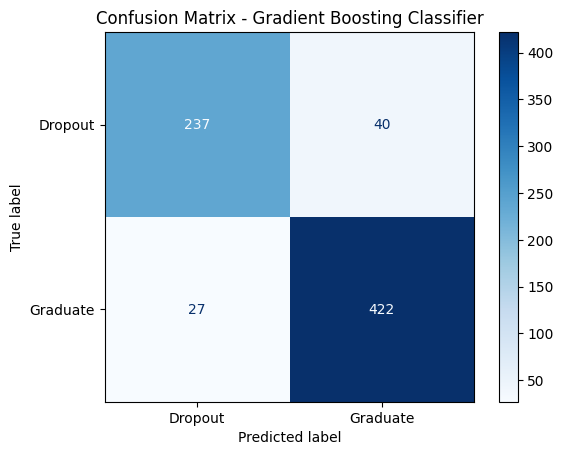

In [42]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.show()

Model Gradient Boosting berhasil mengklasifikasikan dengan cukup baik, dengan 237 Dropout dan 422 Graduate yang terdeteksi benar, serta kesalahan prediksi yang relatif kecil, yaitu 40 Dropout salah diklasifikasikan sebagai Graduate dan 27 Graduate salah diklasifikasikan sebagai Dropout.

### Feature Importance

In [43]:
# Mendapatkan nama fitur numerik dan kategorikal setelah preprocessing
numeric_features_after_preprocessing = preprocessor.named_transformers_['num'].get_feature_names_out(numeric_cols)
categorical_features_after_preprocessing = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

In [44]:
# Menggabungkan fitur numerik dan kategorikal setelah preprocessing
features_after_preprocessing = np.concatenate([numeric_features_after_preprocessing, categorical_features_after_preprocessing])

In [45]:
# Mengambil model classifier yang sudah dilatih dari pipeline
trained_model = pipeline.named_steps['classifier']
# Mendapatkan nilai pentingnya fitur dari model yang sudah dilatih
feature_importances = trained_model.feature_importances_

In [46]:
# Membuat DataFrame berisi fitur dan tingkat kepentingannya
importance_df = pd.DataFrame({'Feature': features_after_preprocessing, 'Importance': feature_importances})

In [47]:
# Mengurutkan berdasarkan importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

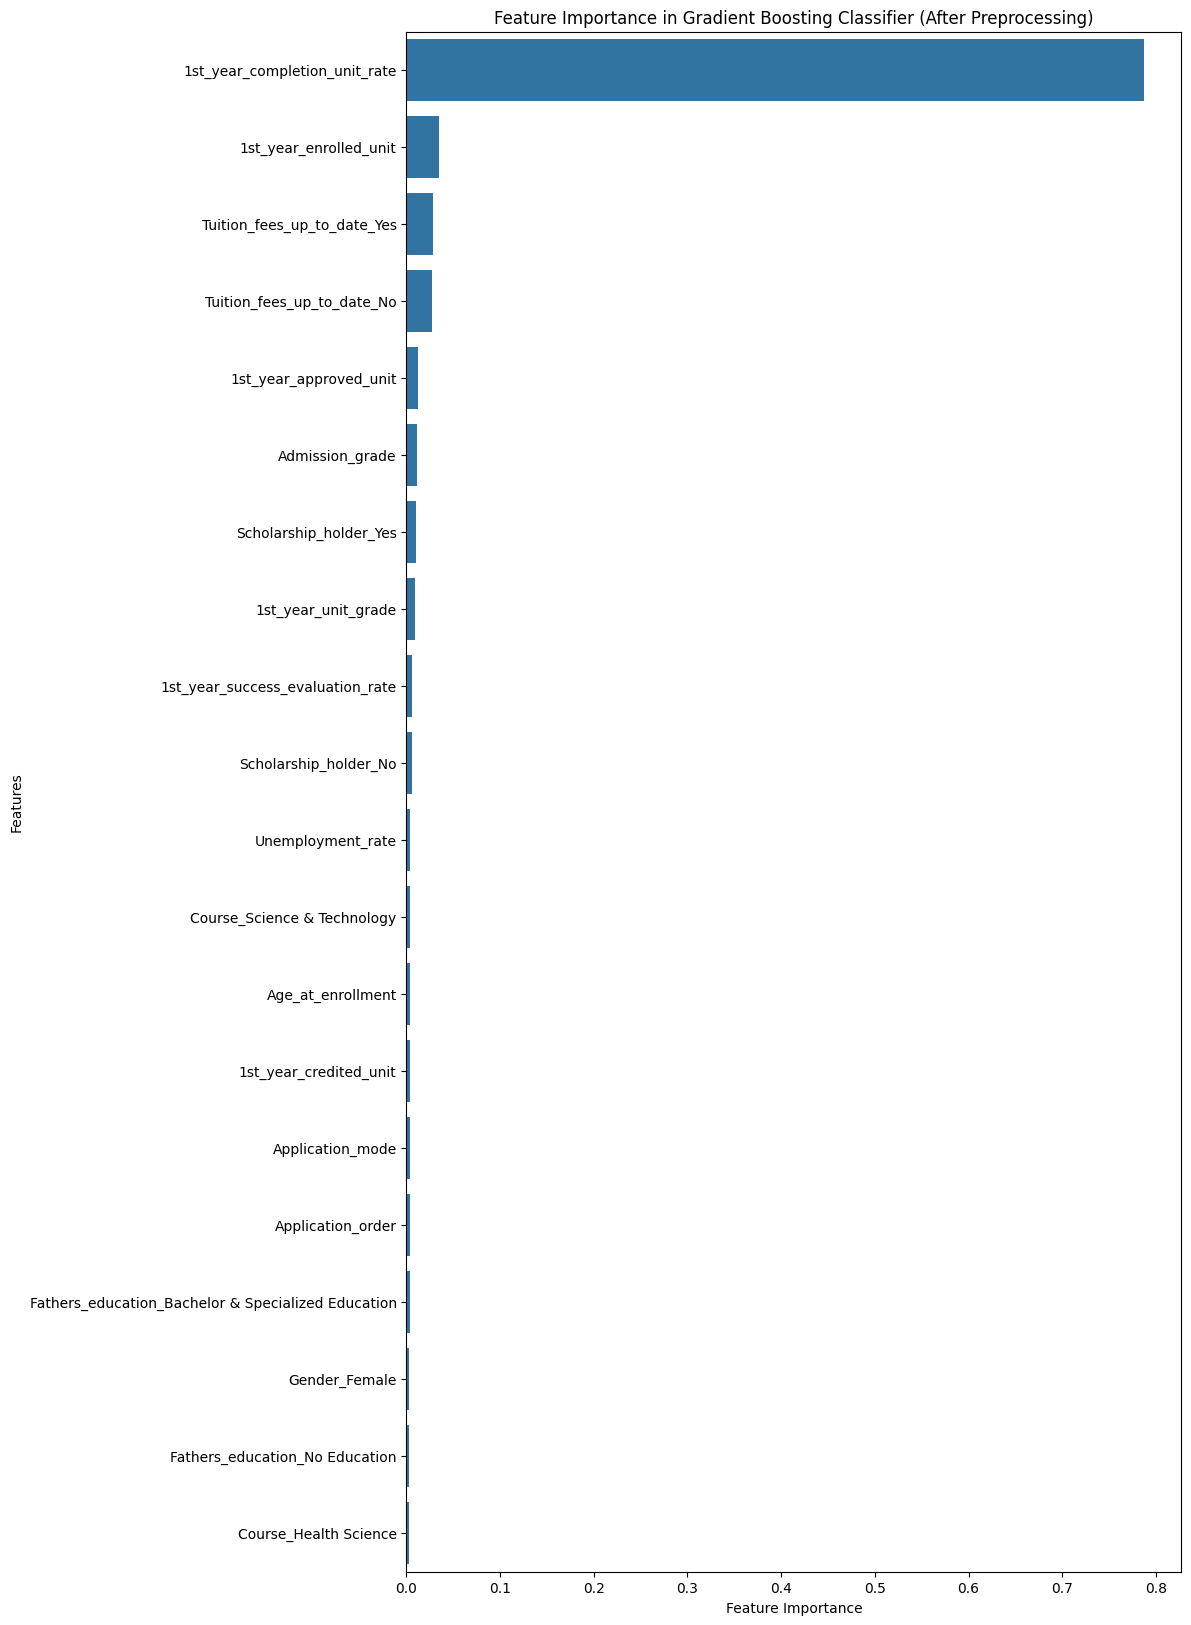

In [48]:
# Menampilkan plot feature importance
plt.figure(figsize=(10, min(len(importance_df) * 0.3, 20)))
sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df.head(20),
    order=importance_df.head(20)['Feature']
)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting Classifier (After Preprocessing)')
plt.show()

In [49]:
# Mengambil sepuluh fitur penting
# Mengurutkan berdasarkan importance dan ambil 10 fitur penting pertama
top_10_features = importance_df.nlargest(10, 'Importance')

# Menampilkan 10 fitur penting
print(top_10_features)

                             Feature  Importance
14     1st_year_completion_unit_rate    0.787832
9             1st_year_enrolled_unit    0.034489
51       Tuition_fees_up_to_date_Yes    0.028453
50        Tuition_fees_up_to_date_No    0.026943
8             1st_year_approved_unit    0.012698
3                    Admission_grade    0.011716
55            Scholarship_holder_Yes    0.009771
13               1st_year_unit_grade    0.009078
15  1st_year_success_evaluation_rate    0.006432
54             Scholarship_holder_No    0.005856


## Deployment Preparations

### Menyiapkan kebutuhan Model dan Preprocessor

In [50]:
# Menyimpan Model and Preprocessor
model = 'model.pkl'
preprocessor = 'preprocessor.pkl'
joblib.dump(pipeline, model)
joblib.dump(preprocessor, preprocessor)
print(f"Model disimpan ke {model}")
print(f"Preprocessor disimpan ke {preprocessor}")

Model disimpan ke model.pkl
Preprocessor disimpan ke preprocessor.pkl


In [51]:
# Menyimpan data ke csv
df_pred.to_csv('data_dropout_graduated.csv', index=False)

In [52]:
print(df_pred.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital_status                    3630 non-null   object 
 1   Application_mode                  3630 non-null   int64  
 2   Application_order                 3630 non-null   int64  
 3   Course                            3630 non-null   object 
 4   Previous_qualification_grade      3630 non-null   float64
 5   Nationality                       3630 non-null   object 
 6   Mothers_occupation                3630 non-null   object 
 7   Fathers_occupation                3630 non-null   object 
 8   Admission_grade                   3630 non-null   float64
 9   Displaced                         3630 non-null   object 
 10  Educational_special_needs         3630 non-null   object 
 11  Debtor                            3630 non-null   object 
 12  Tuition_fee

In [53]:
df_enrol = df_cleaned[df_cleaned['Status'] == 'Enrolled']

In [54]:
df_enrol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 16 to 4413
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Marital_status                    794 non-null    object 
 1   Application_mode                  794 non-null    int64  
 2   Application_order                 794 non-null    int64  
 3   Course                            794 non-null    object 
 4   Previous_qualification_grade      794 non-null    float64
 5   Nationality                       794 non-null    object 
 6   Mothers_occupation                794 non-null    object 
 7   Fathers_occupation                794 non-null    object 
 8   Admission_grade                   794 non-null    float64
 9   Displaced                         794 non-null    object 
 10  Educational_special_needs         794 non-null    object 
 11  Debtor                            794 non-null    object 
 12  Tuition_fee

In [55]:
# Menyimpan data ke csv
df_enrol.to_csv('data_enrolled.csv', index=False)

### Menyiapkan kebutuhan requirements.txt

In [56]:
# !pip install pipreqs

In [57]:
# from google.colab import drive
# drive.mount('/content/drive')

In [58]:
# !pipreqs "/content/drive/MyDrive/Colab Notebooks/Data Science Sub 2" --scan-notebooks